<a href="https://colab.research.google.com/github/samwpolk/COMPSCIX433.6-010/blob/master/leaf_A21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import HTML,display, IFrame
display(IFrame(src='https://archive.ics.uci.edu/ml/datasets/Leaf#', width=1500, height=600))


The results of the classification analysis performed are presented below
Method Cross-validation Error CVE  Classification Error CE


LDA CVA 50.2% CE 53.9%


KNN (1) CVE 49.0% CE 55.1%

KNN (3) CVE 53.1% CE 56.2%


KNN (5) CVE 53.0% CE 61.8%



**The best results
were achieved for the combination of shape and texture features with LDA with a crossvalidation error of 22.3% and a classification accuracy of 84.3% in the test set.**

In [ ]:
import io
import sys
import os
from google.colab import files
fl = files.upload()




Saving leaves.csv to leaves (2).csv


In [6]:
import numpy as np

import pandas as pd

import seaborn as sns

import seaborn as sb

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA




#!pip install libra
from libra import client

#!pip install dabl
import dabl as db

#!pip install pycaret
from pycaret.classification import *



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
df = pd.read_csv('/content/leaves.csv')
#df.columns = df.columns.str.replace(' ', '_')

In [8]:
names = df['Name']
number = df['Number']
df1 = df.drop(['Number'], axis = 1)
df2 = df.drop(['Name'], axis =1)
features = df.drop(['Name','Number'], axis = 1)
df_shape_features = df.drop(['Average_Intensity','Average_Contrast', 'Smoothness', 'Third_moment', 'Uniformity','Entropy','Number'],axis=1)
df_text_features = df[['Average_Intensity','Average_Contrast', 'Smoothness', 'Third_moment', 'Uniformity','Entropy','Number','Name']],;

X_train, X_test, y_train, y_test = train_test_split(features,names, random_state=1)

#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)


In [ ]:
df.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Eccentricity               float64
 1   Aspect_Ratio               float64
 2   Elongation                 float64
 3   Solidity                   float64
 4   Stochastic_Convexity       float64
 5   Isoperimetric_Factor       float64
 6   Maximal_Indentation_Depth  float64
 7   Lobedness                  float64
 8   Average_Intensity          float64
 9   Average_Contrast           float64
 10  Smoothness                 float64
 11  Third_moment               float64
 12  Uniformity                 float64
 13  Entropy                    float64
 14  Number                     int64  
 15  Name                       object 
dtypes: float64(14), int64(1), object(1)
memory usage: 42.6+ KB


In [ ]:
features.describe().style.background_gradient(cmap='Greys')

In [ ]:
df.sample(8).style.background_gradient(cmap='Greys')

In [ ]:
x=features.describe()
x=x.iloc[1:,0:8]
x.style.background_gradient(cmap='Greys')

In [ ]:
x=features.describe()
x=x.iloc[1:,8:14]
x.style.background_gradient(cmap='Greys')

In [ ]:
df.isnull().sum().sum()

0

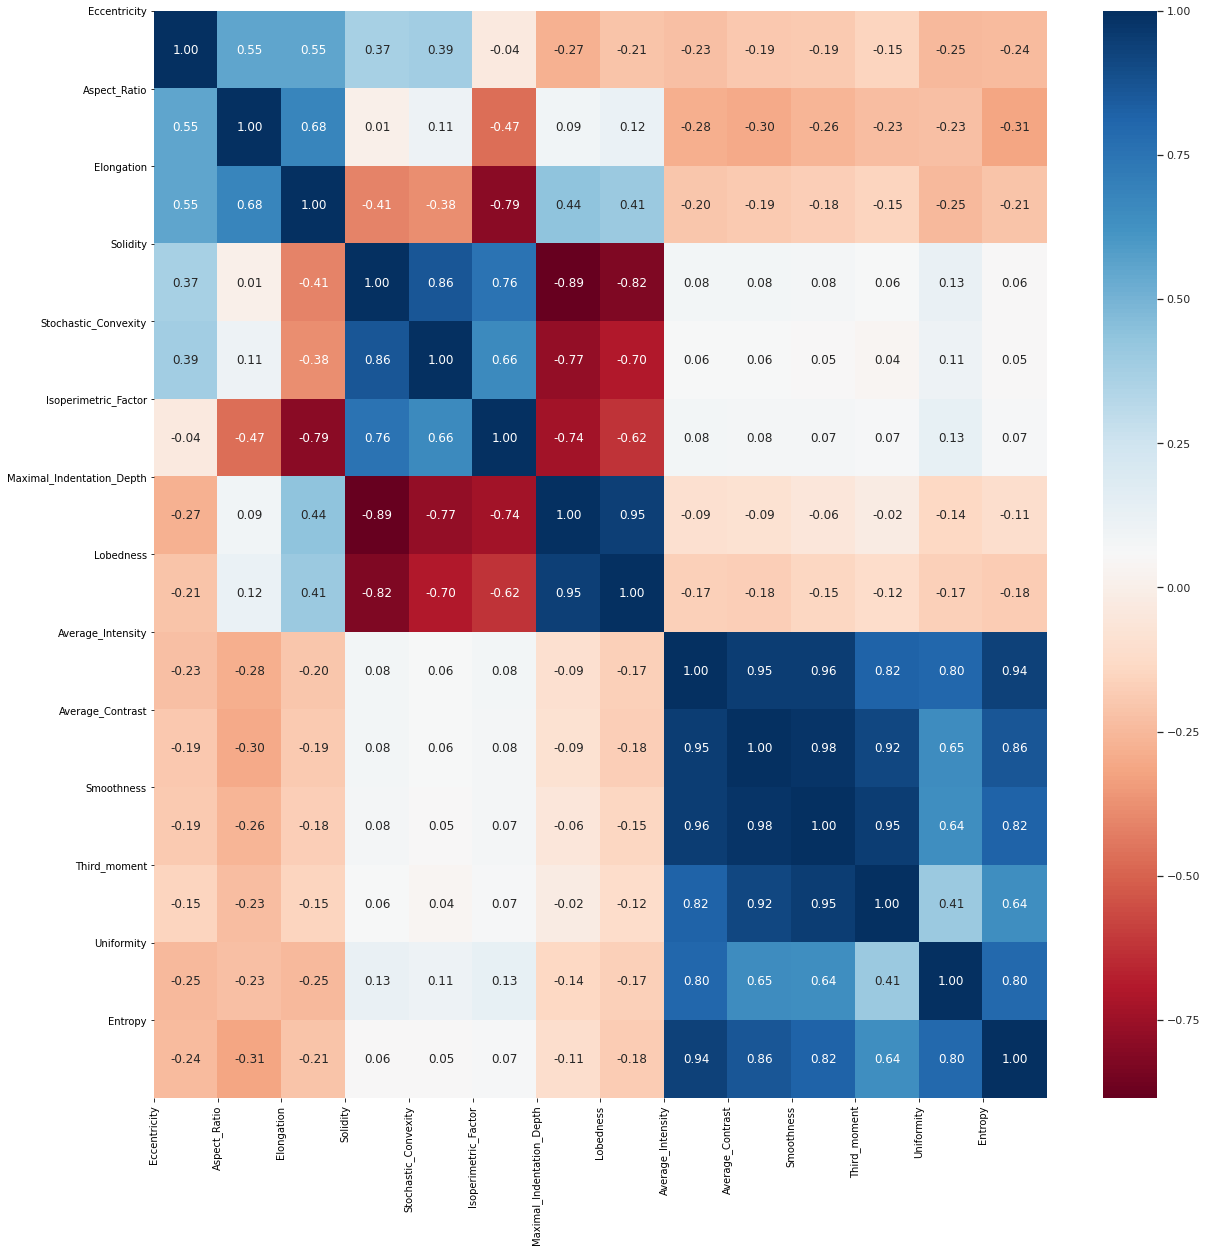

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt
corr = df.drop(['Number'],axis = 1).corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(20, 20))
sns.set(style="dark")
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [ ]:
x = pd.DataFrame(df.dtypes)
x

0
Eccentricity               float64
Aspect_Ratio               float64
Elongation                 float64
Solidity                   float64
Stochastic_Convexity       float64
Isoperimetric_Factor       float64
Maximal_Indentation_Depth  float64
Lobedness                  float64
Average_Intensity          float64
Average_Contrast           float64
Smoothness                 float64
Third_moment               float64
Uniformity                 float64
Entropy                    float64
Number                       int64
Name                        object

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sb
sb.set(style="dark")

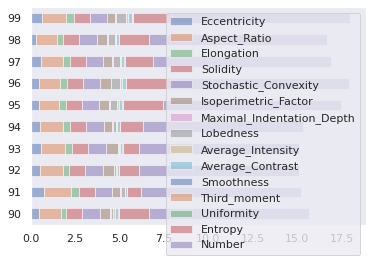

In [ ]:
df[90:100].plot(kind='barh', stacked=True, alpha=0.5)

(-1.25, 1.25, -1.25, 1.25)

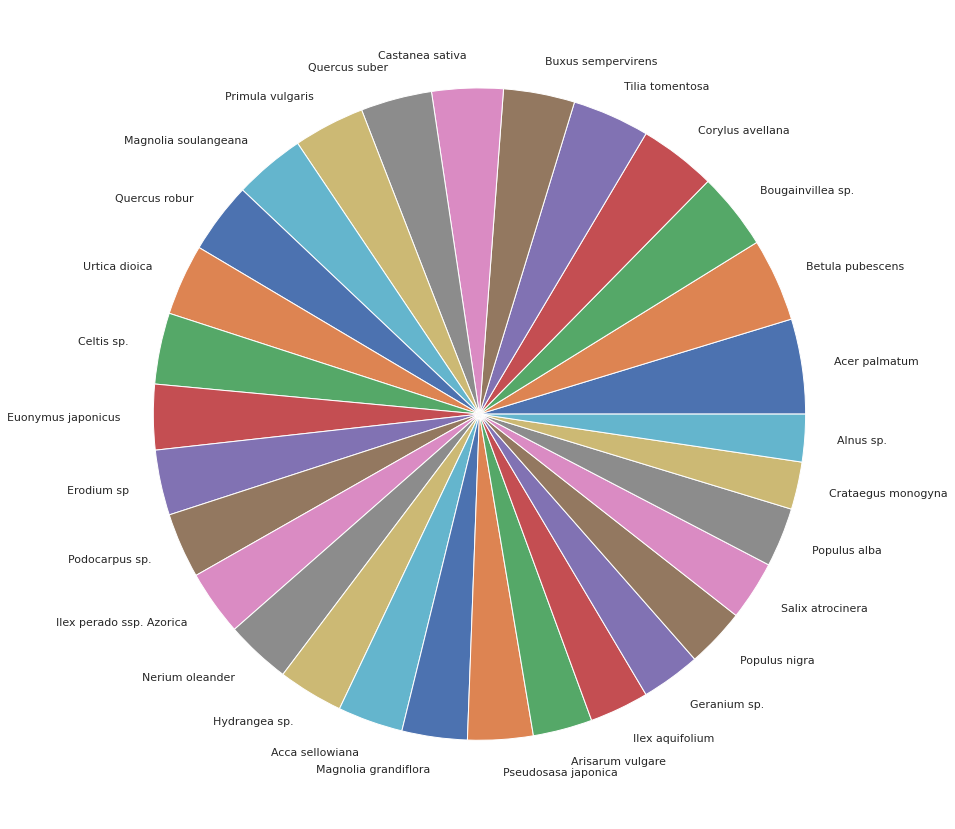

In [ ]:
df["Name"].value_counts().plot(kind='pie',figsize=(15,15))
plt.axis("off")

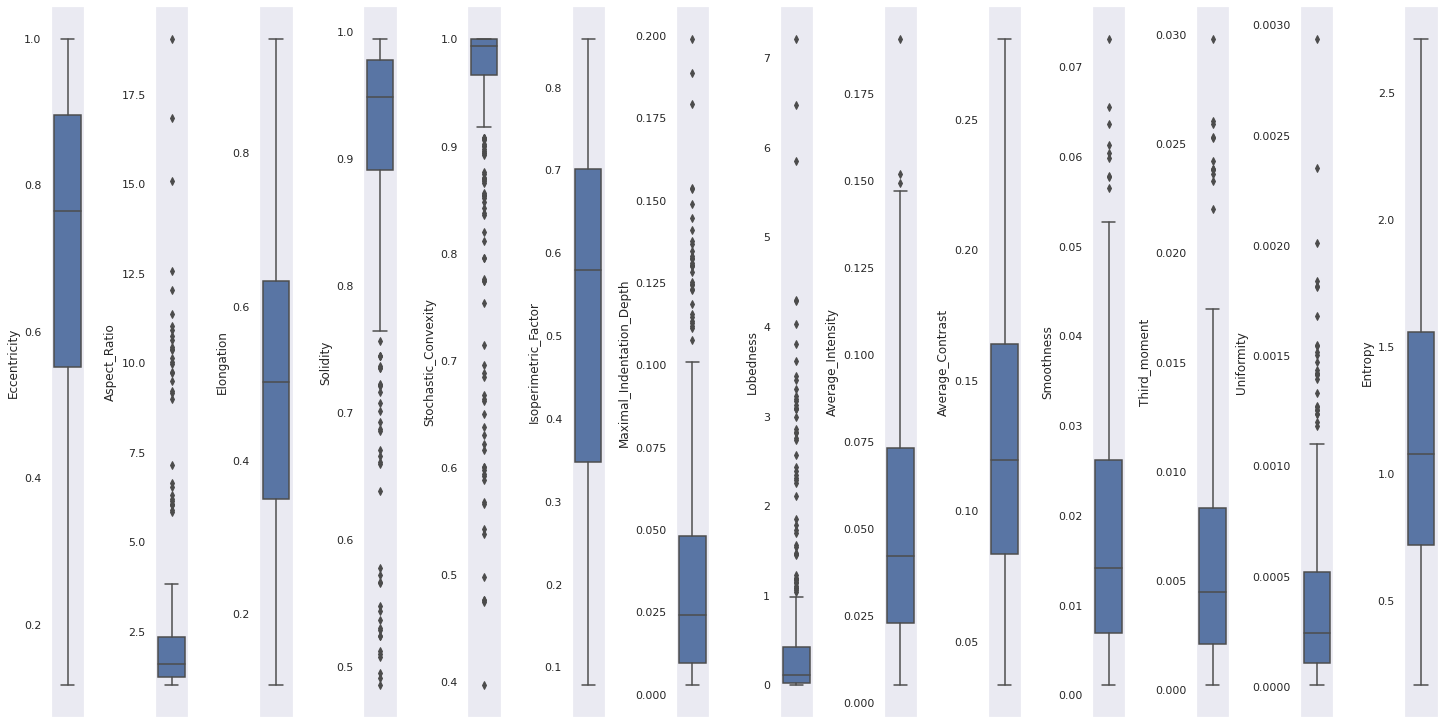

In [ ]:
fig, axs = plt.subplots(ncols=14, nrows=1, figsize=(20, 10))
sns.set(style="dark")
index = 0
axs = axs.flatten()
for k,v in df1.items():
    if index < 14:
      sns.boxplot(y=k, data=df1, ax=axs[index])
      index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

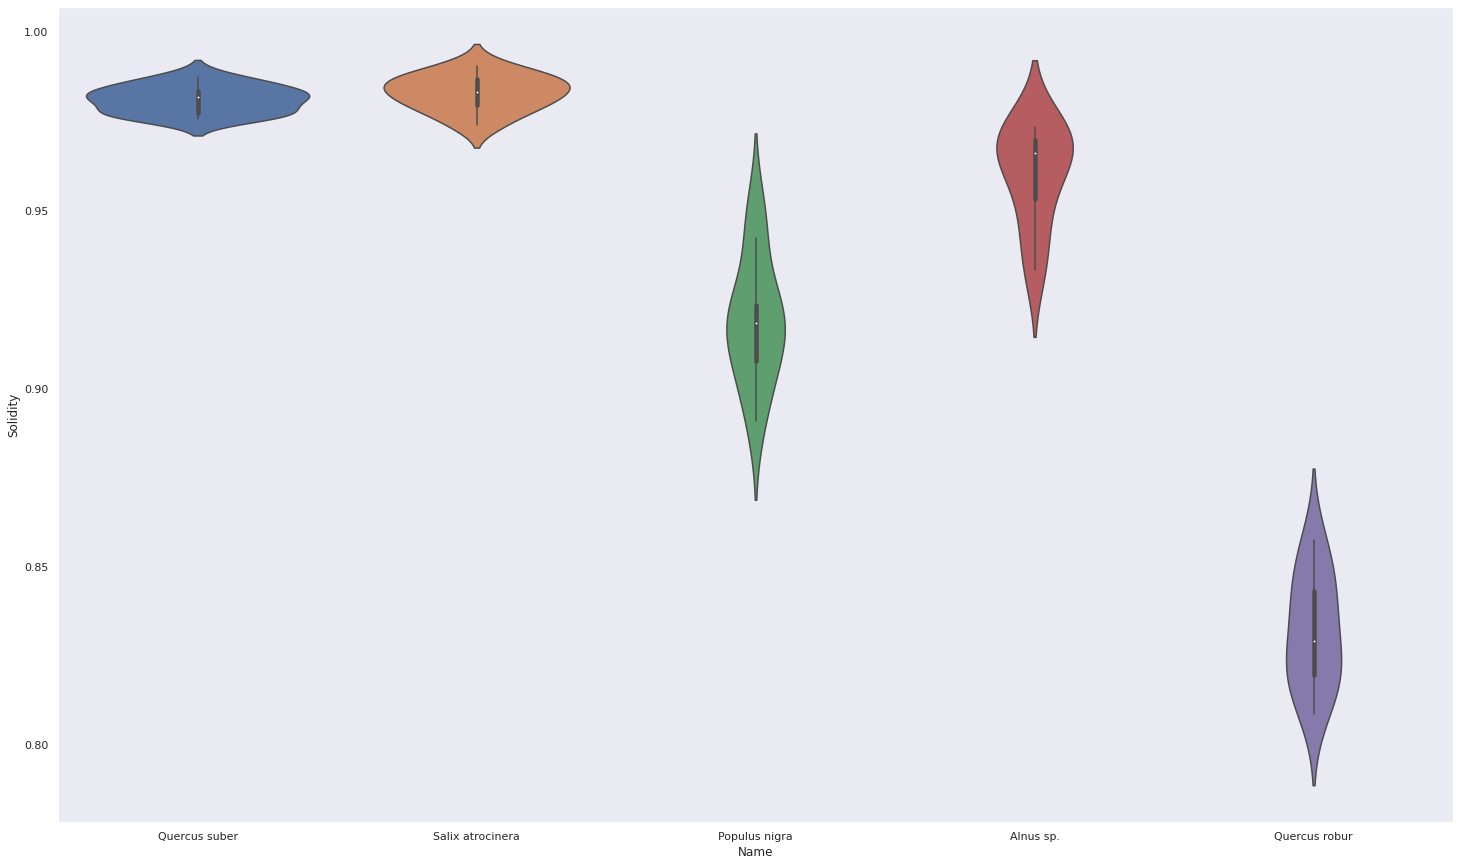

In [ ]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(25, 15))
sns.set(style="dark")
ax = sns.violinplot(x="Name", y="Solidity", data=df[0:50])

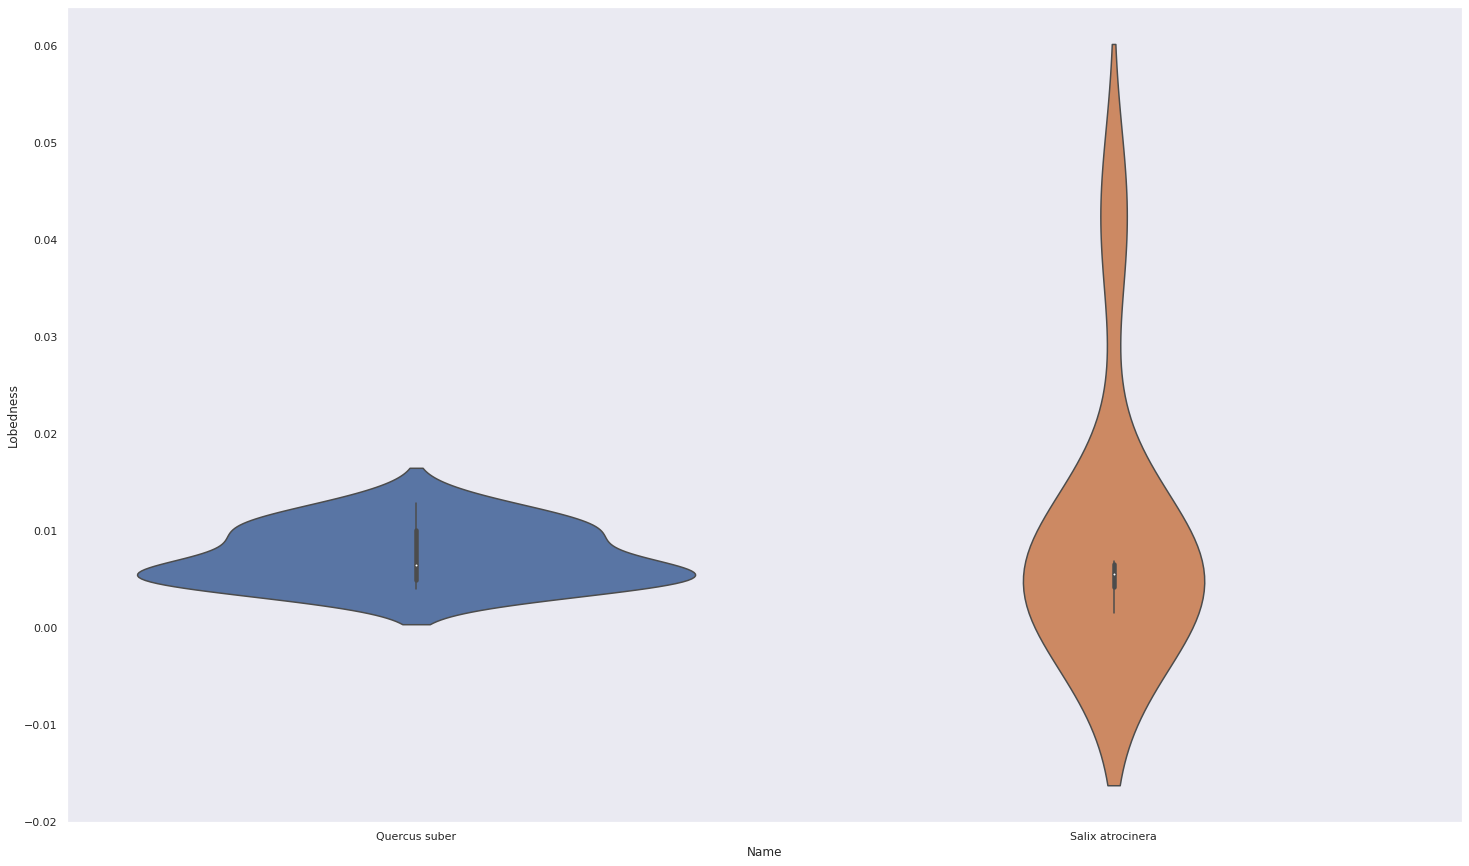

In [ ]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(25, 15))
sns.set(style="darkgrid")
ax = sns.violinplot(x="Name", y="Lobedness", data=df[0:20])

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f7e1d01b378> (for post_execute):


KeyboardInterrupt: ignored

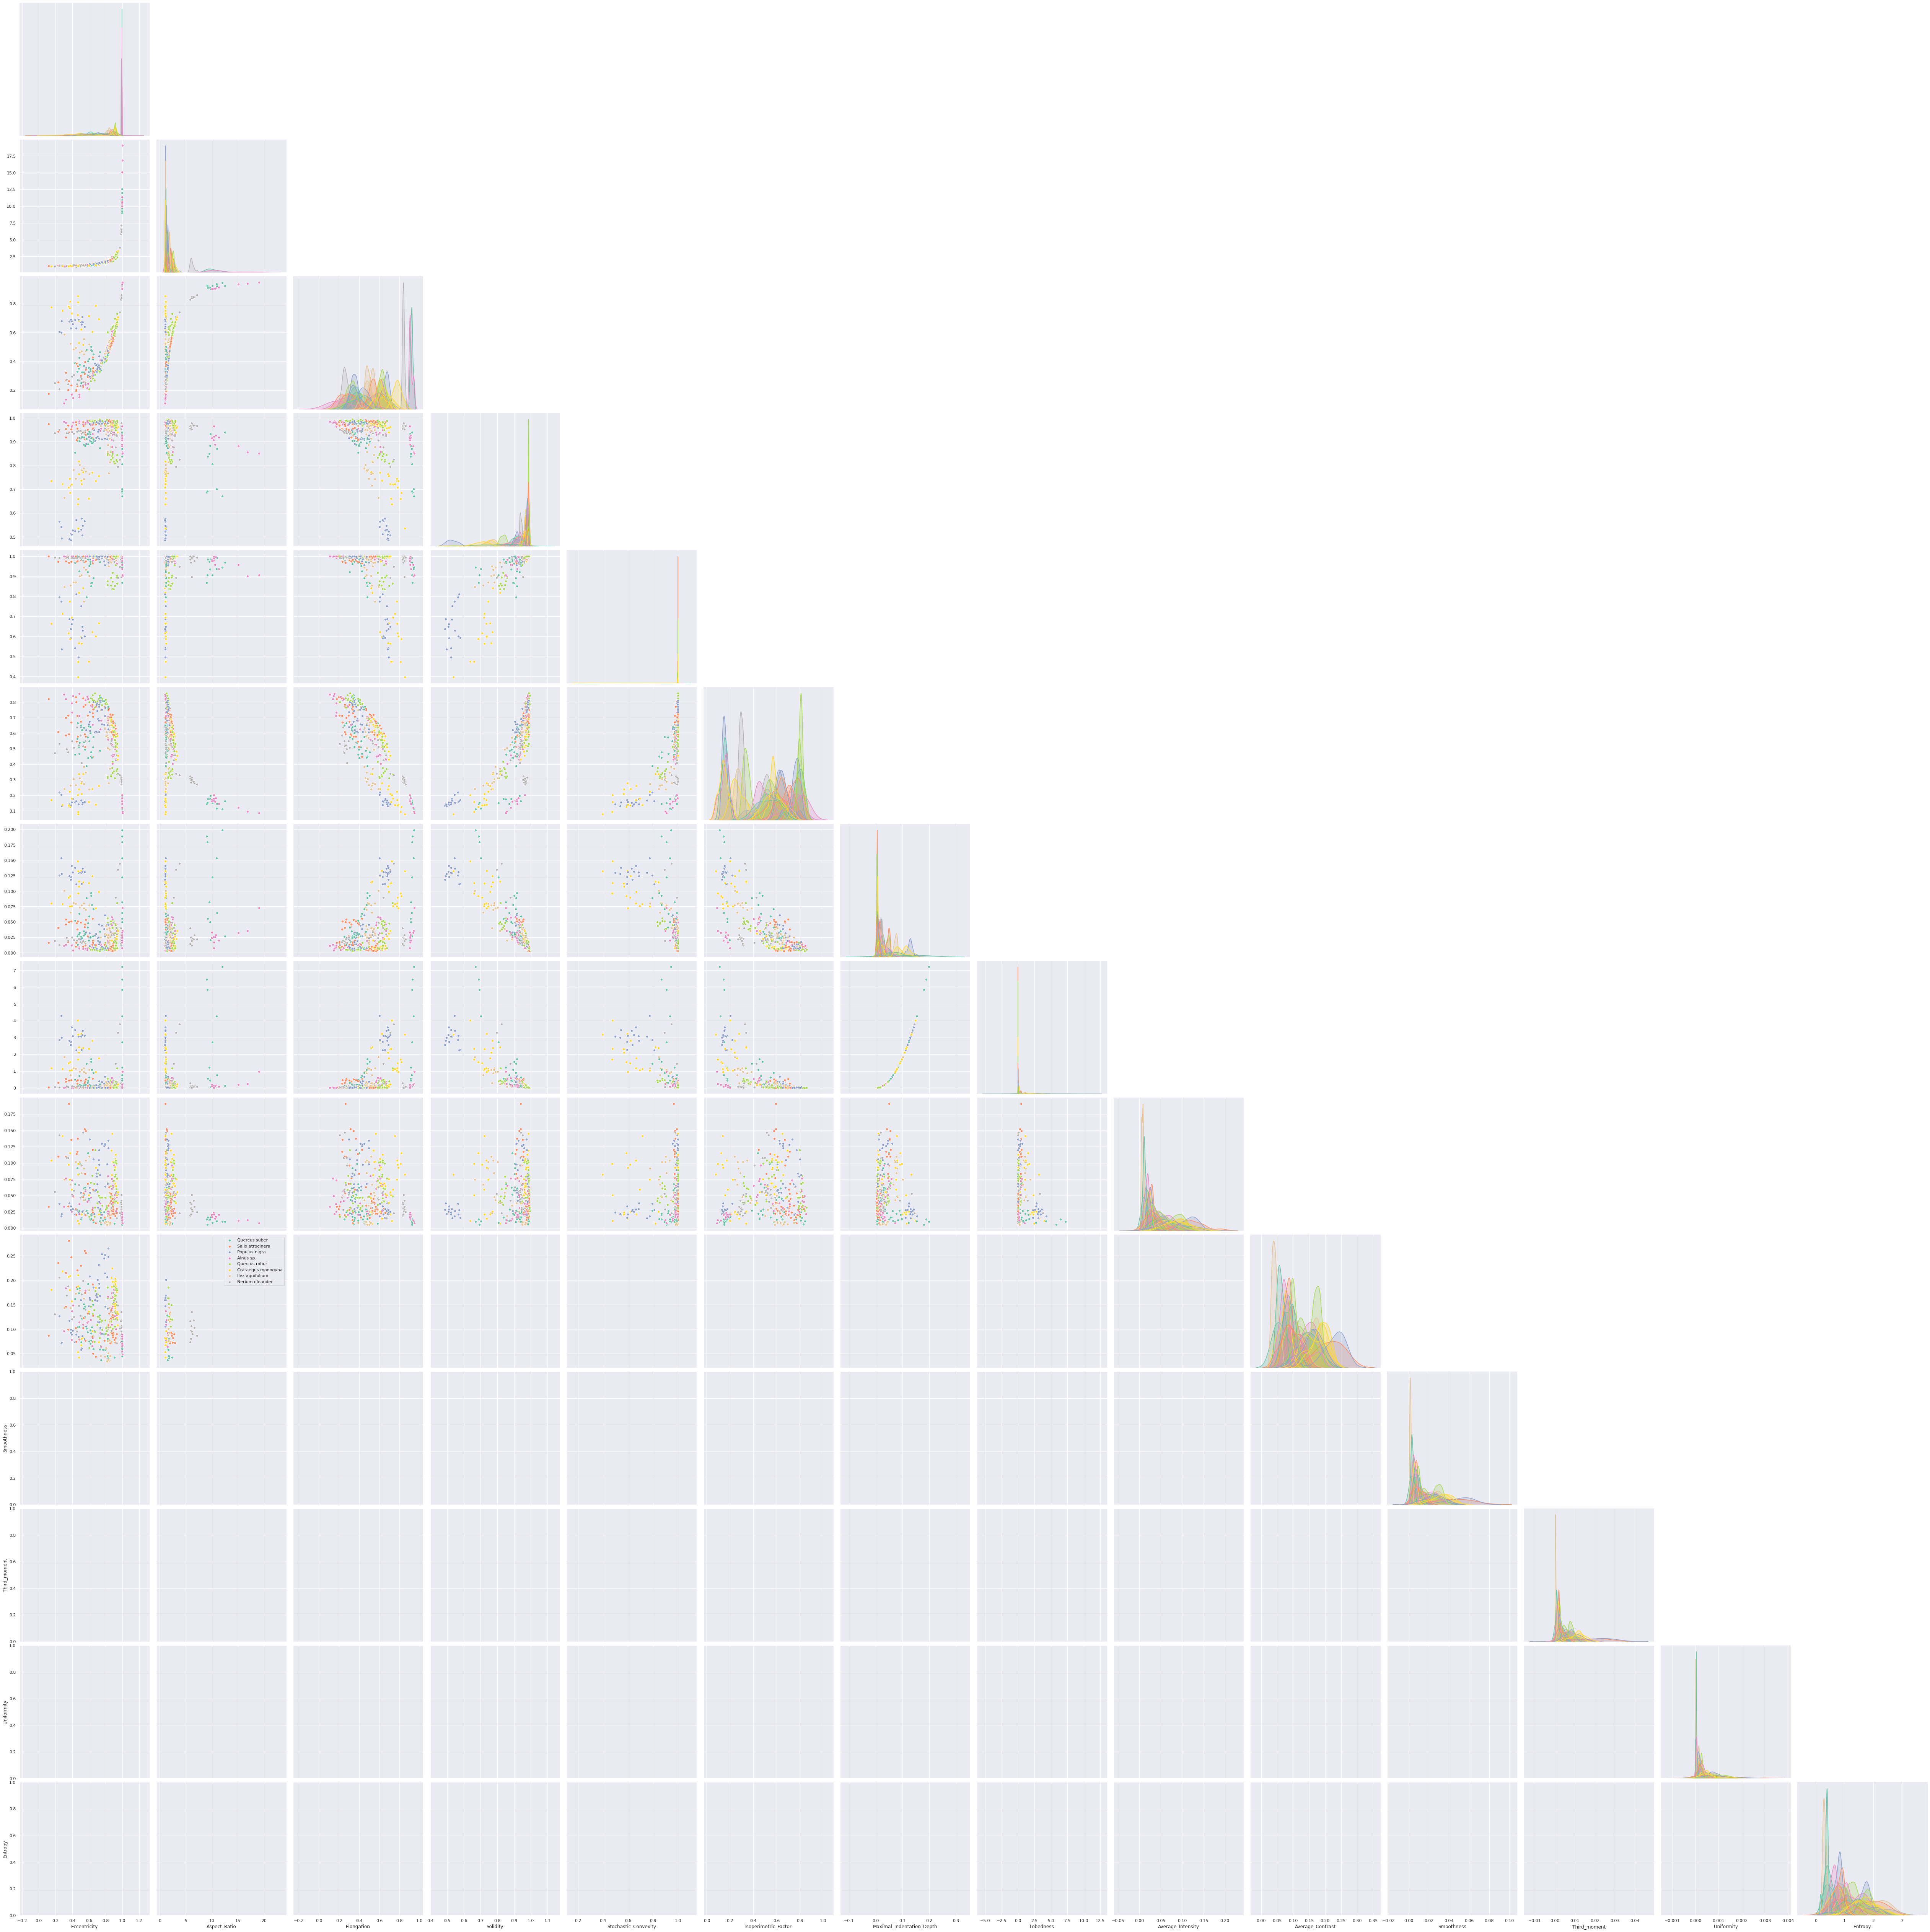

In [ ]:
sns.pairplot(df.drop(['Number'], axis=1),hue="Name", corner = True,palette="Set2", size = 5)
sns.set(style="dark")
plt.show()

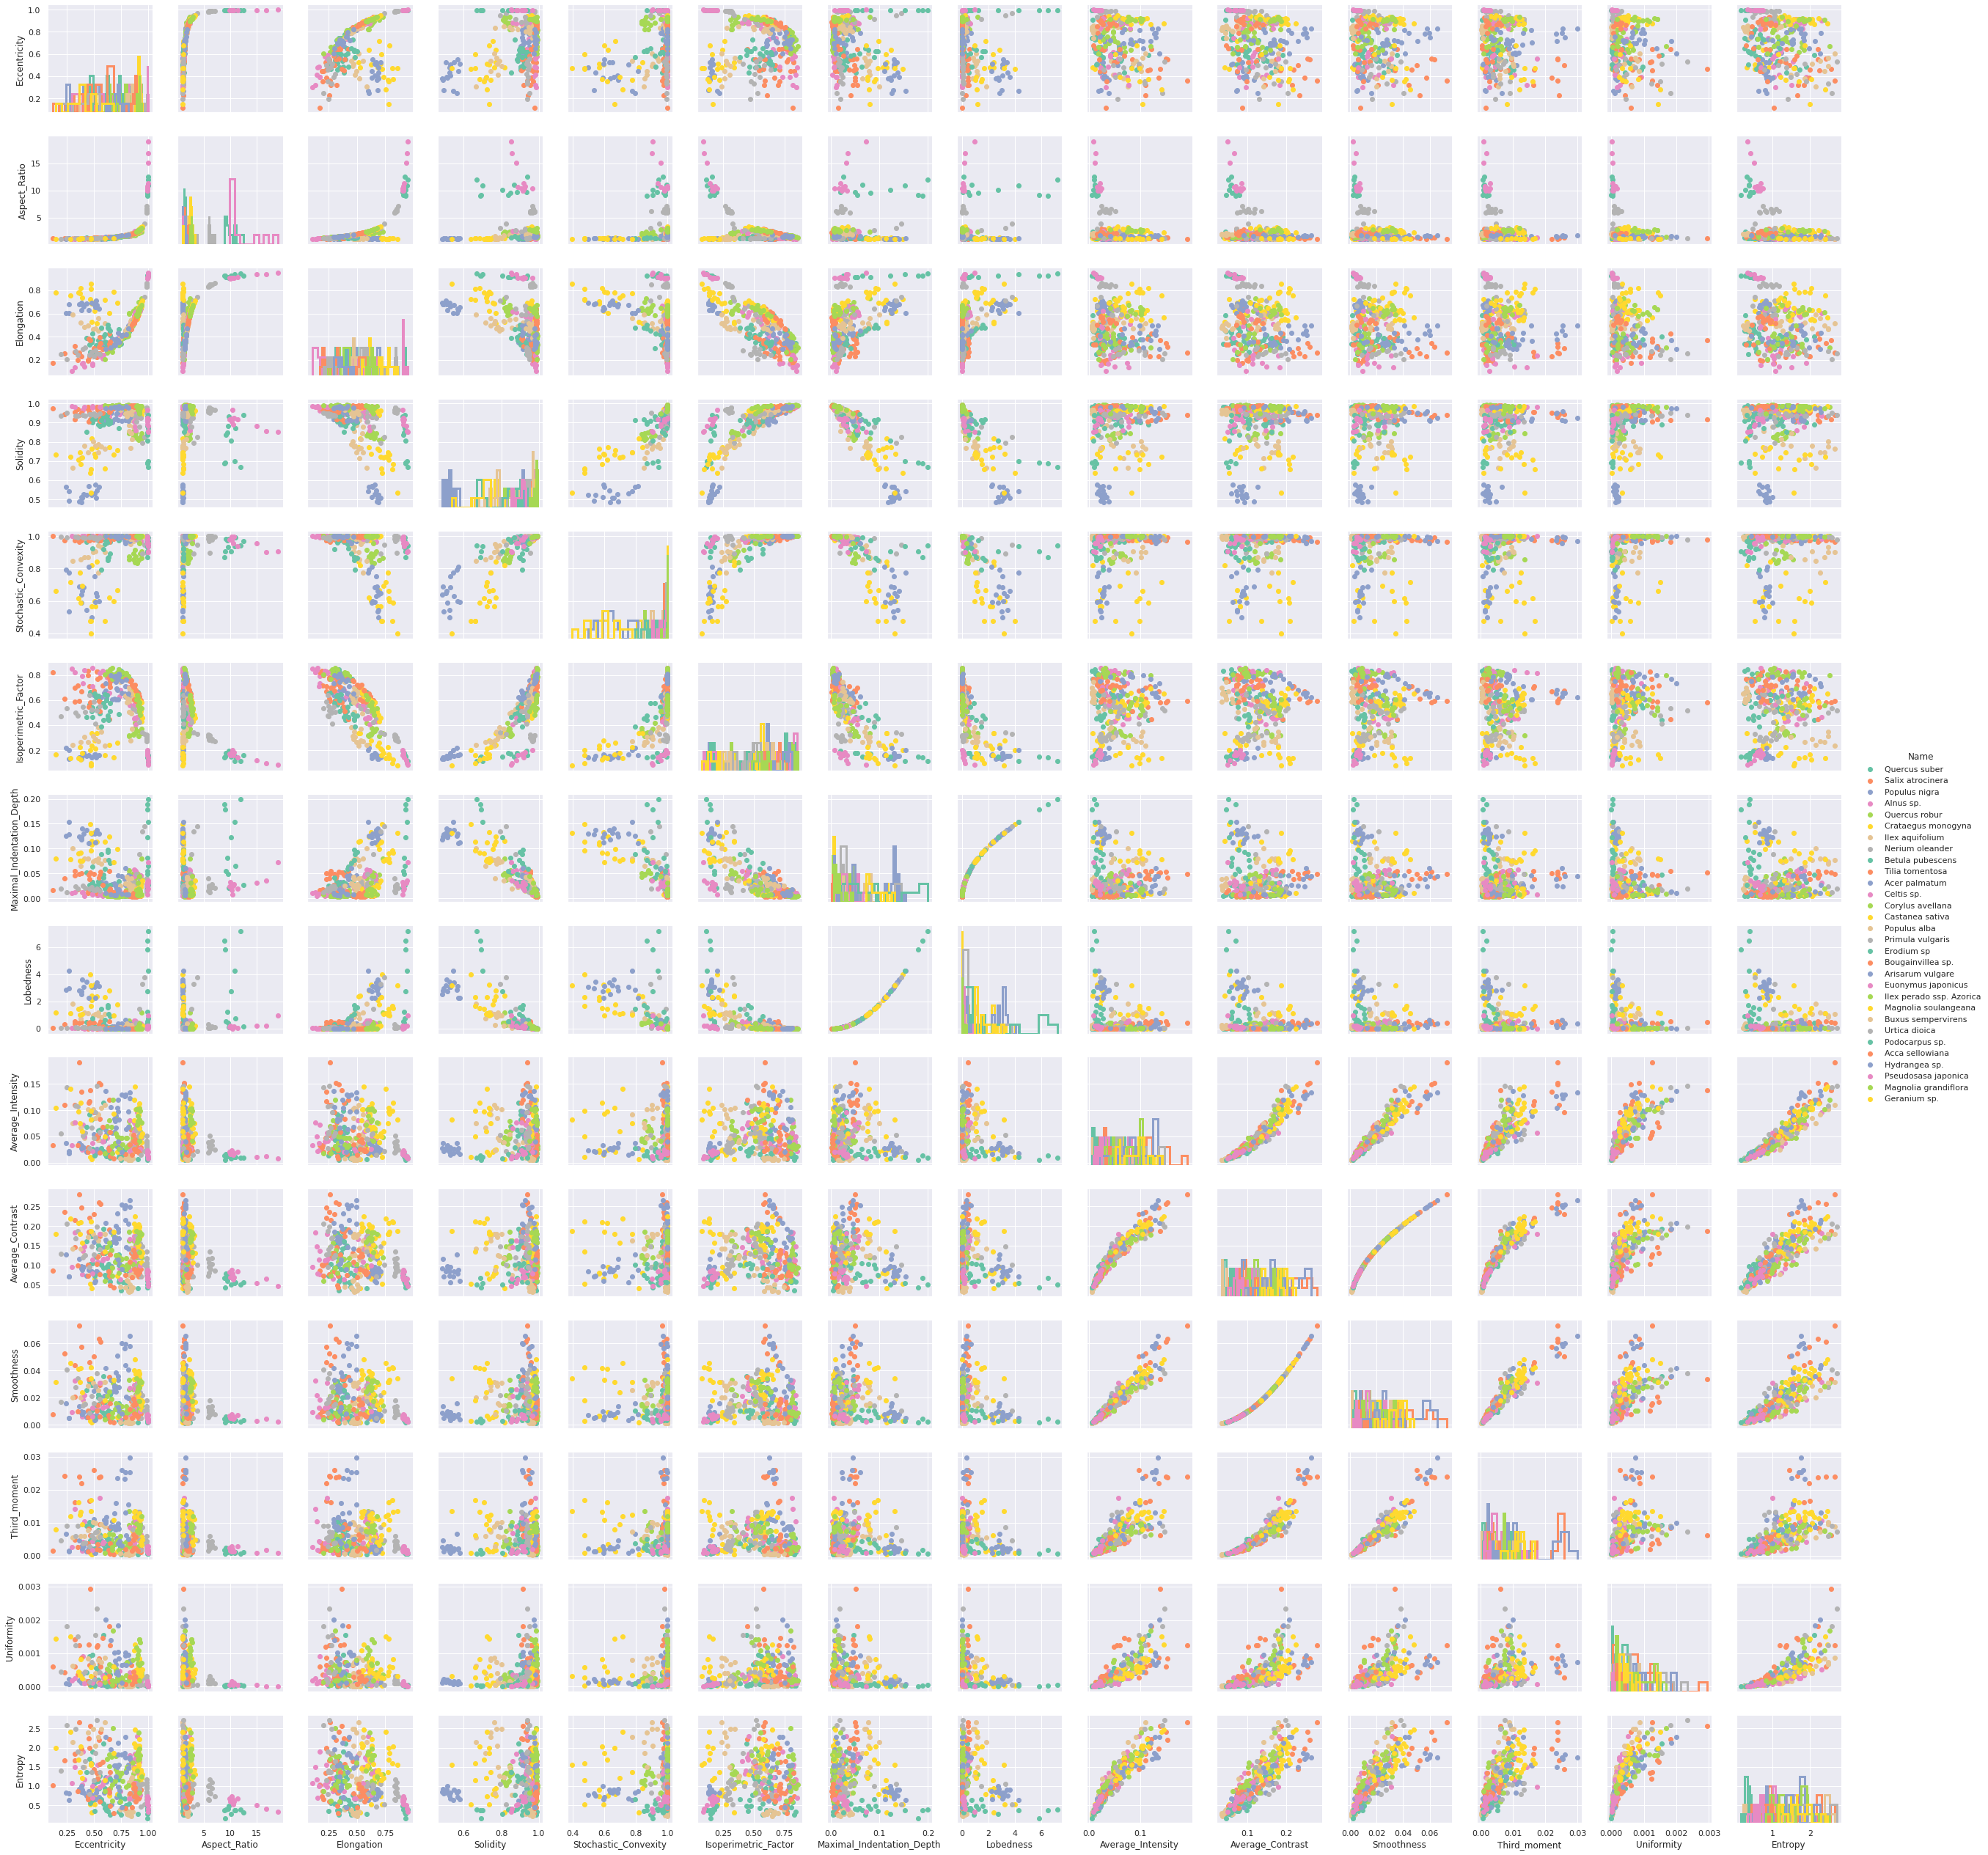

In [ ]:
g = sns.PairGrid(df.drop(['Number'], axis=1),hue='Name',palette="Set2")
g = g.map_diag(plt.hist, histtype="step", linewidth=3)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

In [ ]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_scaled
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
x=vif.round(1)
x=x.iloc[1:,0:8]
x.style.background_gradient(cmap='cividis')

In [ ]:
vif = pd.DataFrame()
X = X_train_scaled.iloc[1:,0:8]
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
x=vif.round(1)
x=x.iloc[1:,0:8]
x.style.background_gradient(cmap='cividis')

NameError: ignored

In [ ]:
vif = pd.DataFrame()
X = X_train_scaled.iloc[1:,7:14]
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
x=vif.round(1)
x=x.iloc[1:,0:8]
x.style.background_gradient(cmap='cividis')

In [ ]:
display(IFrame(src='https://dabl.github.io/dev/', width=1500, height=600))

Target looks like classification
Linear Discriminant Analysis training set score: 0.872


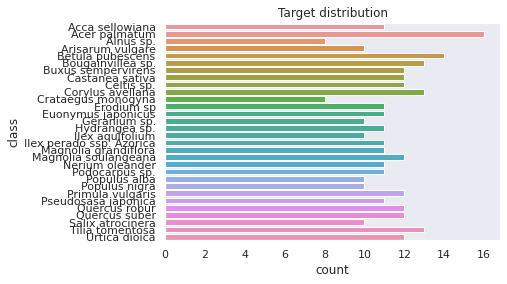

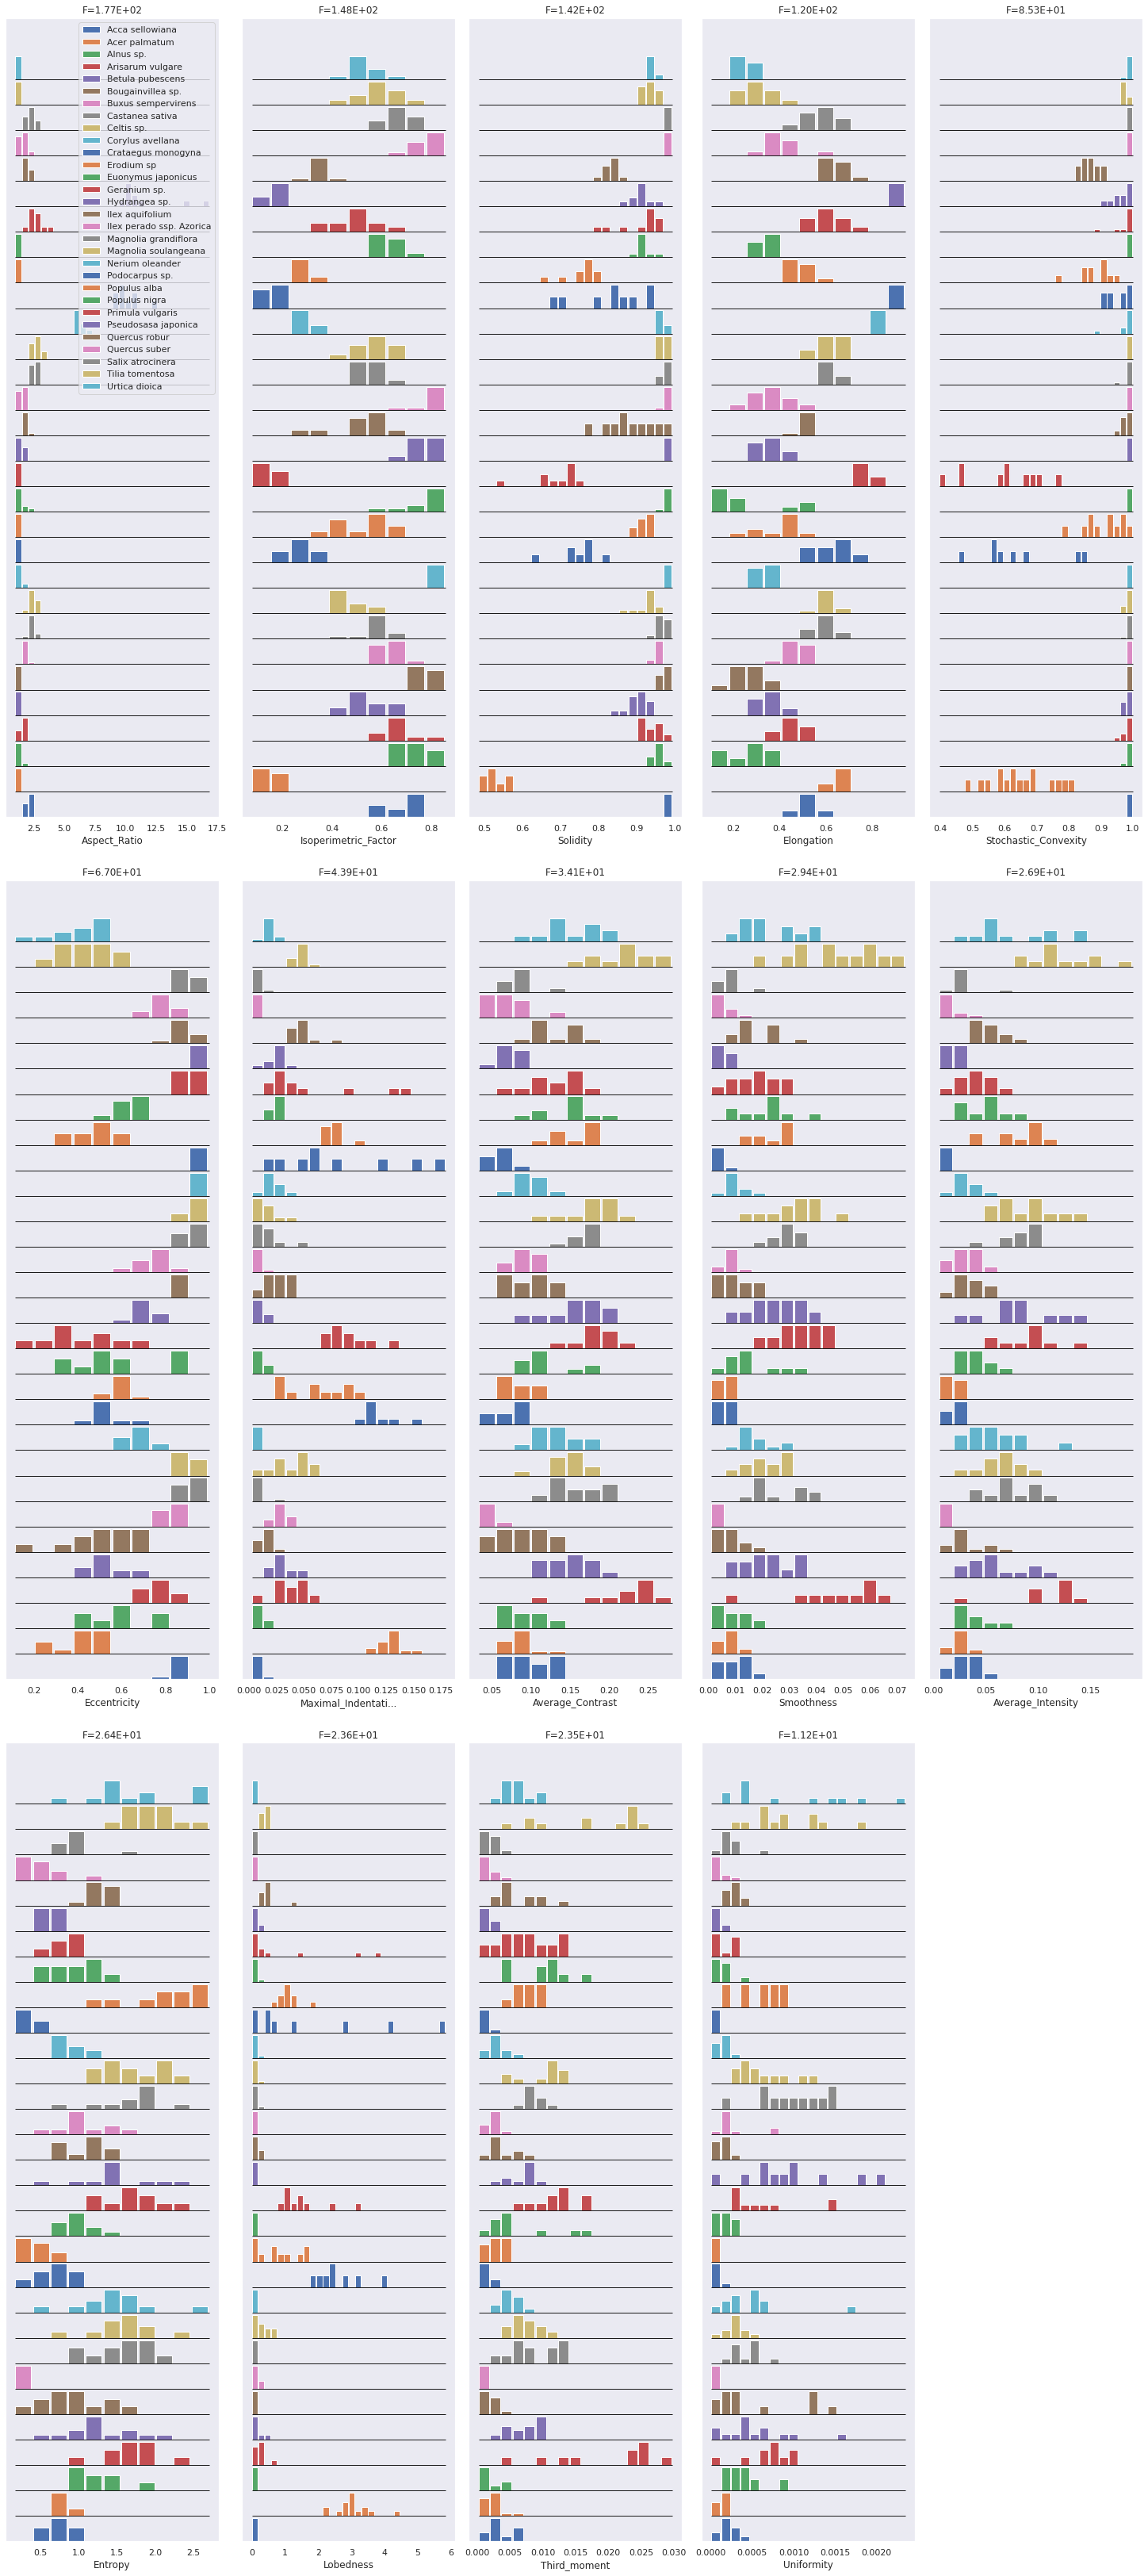

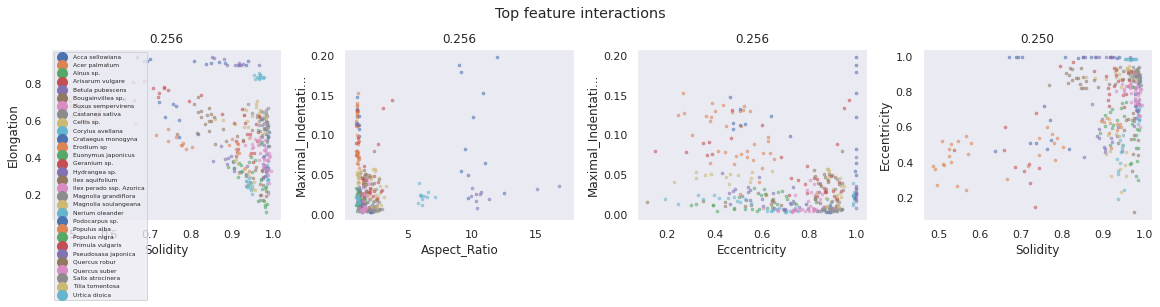

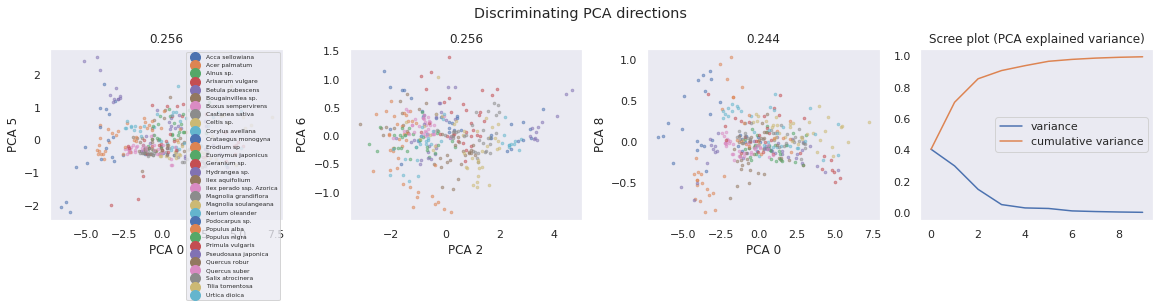

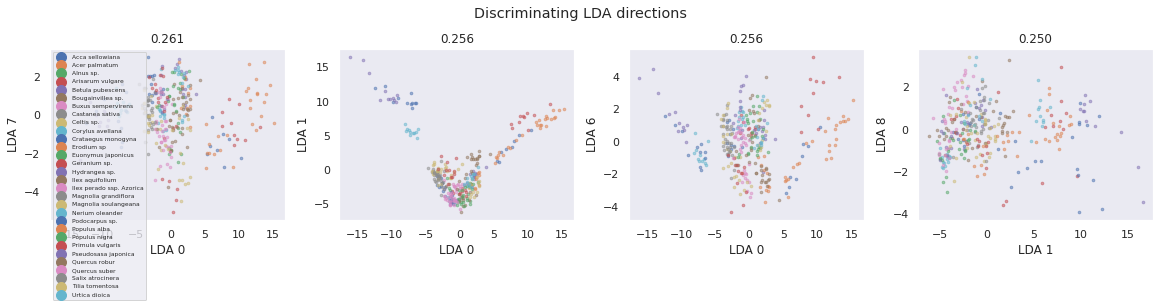

In [ ]:
db.plot(df.drop(['Number'], axis = 1),target_col='Name', verbose=50,scatter_size=7)

[CV]  ................................................................
[CV]  , accuracy=0.039, f1_macro=0.003, precision_macro=0.001, recall_macro=0.033, total=   0.0s
[CV]  ................................................................
[CV]  , accuracy=0.059, f1_macro=0.004, precision_macro=0.002, recall_macro=0.033, total=   0.0s
[CV]  ................................................................
[CV]  , accuracy=0.039, f1_macro=0.003, precision_macro=0.001, recall_macro=0.033, total=   0.0s
[CV]  ................................................................
[CV]  , accuracy=0.039, f1_macro=0.003, precision_macro=0.001, recall_macro=0.033, total=   0.0s
[CV]  ................................................................
[CV]  , accuracy=0.039, f1_macro=0.003, precision_macro=0.001, recall_macro=0.033, total=   0.0s
Running DummyClassifier(strategy='prior')
accuracy: 0.043 recall_macro: 0.033 precision_macro: 0.001 f1_macro: 0.003
=== new best DummyClassifier(strategy='prio

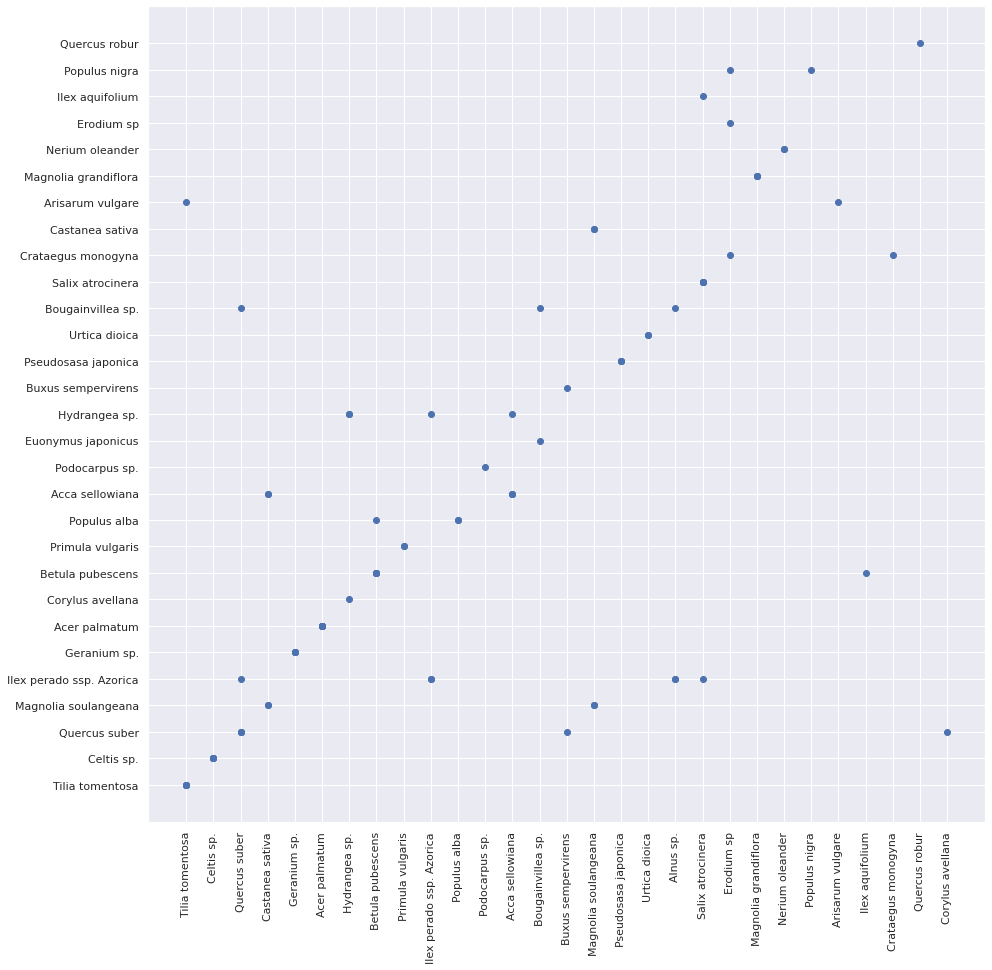

In [ ]:
sc = db.SimpleClassifier(random_state=314, verbose=4, shuffle=True).fit(X_train_scaled,y_train)
y_pred = sc.predict(X_test_scaled)
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
plt.scatter(y_pred,y_test)
print("score", sc.score(X_test_scaled, y_test))
print(sc.types_)
print(sc.current_best_)
print(sc.feature_names_)





In [ ]:
df_clean = db.clean(df),;

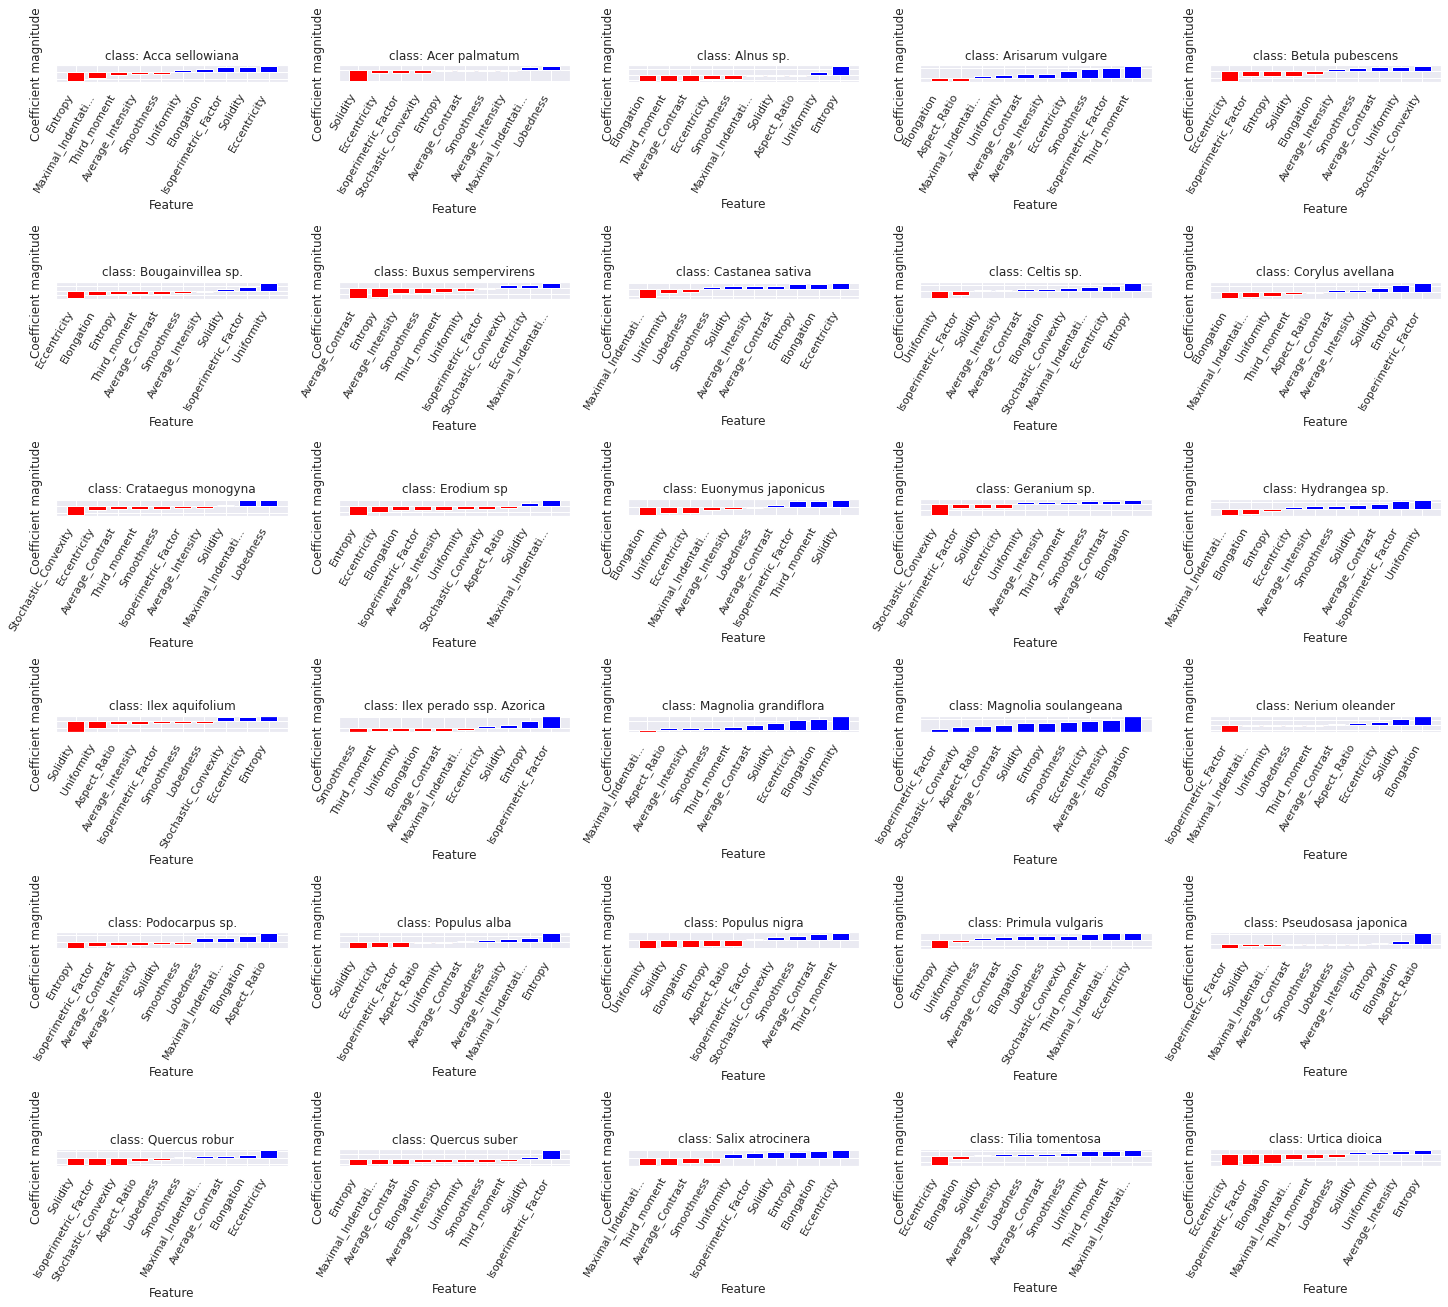

In [ ]:
db.explain(sc, n_top_features= 10)

**An ergonomic machine learning library for non-technical users. Save time. Blaze through ML.**



The core functionality of libra works through the client object. A new client object should be created for every dataset that you want to produce results for. All information about the models that're built, the plots that are generated, and the metrics are created will be stored in the object.

You can then call different queries on that client object, and the dataset you passed to it will be use

In [ ]:
#!pip install libra
#from libra import client

Creating client object
  |- Reading in dataset


Reading in dataset
  |- Preprocessing data
  ->Target column found: Name
    |- Labels being mapped to appropriate classes
      |- Fitting Decision Tree
      ->Score found on testing set: 0.4909090909090909
        |- Stored model under 'decision_tree' key


Analyzing decision_tree for further understanding
  |- Making predictions for test data
  ->Plotting ROC curves and creating confusion matrix...
    |- Investigating potential issues with calculations
      |- Gathering metrics for display: 
      ->Accuracy on test set: 0.4909090909090909
      ->Recall on test set: 0.4909090909090909
      ->Precision on test set: 0.4909090909090909
      ->F1 Score on test set: 0.4909090909090909



dict_keys(['id', 'model', 'target', 'num_classes', 'accuracy', 'accuracy_score', 'preprocesser', 'interpreter', 'test_data', 'plots', 'scores'])

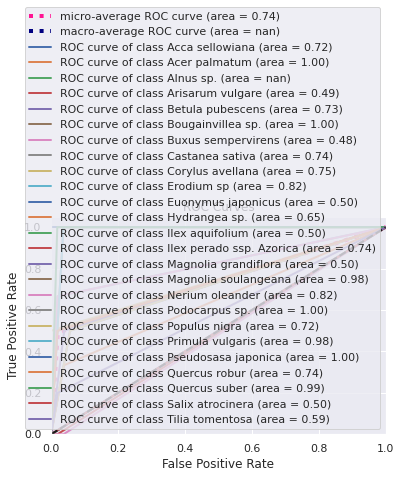

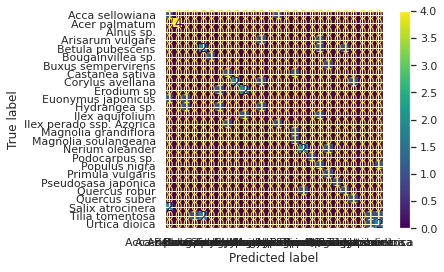

In [ ]:
#open the dataset
a_client = client('/content/leaves.csv')
a_client.decision_tree_query('Name', drop=['Number'])
a_client.analyze()
a_client.info()

In [ ]:
model = ExtraTreesRegressor()
model.fit(features,number)
fr = model.feature_importances_


Feature ranking:
1. feature Solidity(3) (0.100499)
2. feature Elongation(2) (0.090490)
3. feature Isoperimetric_Factor(5) (0.088570)
4. feature Aspect_Ratio(1) (0.087462)
5. feature Eccentricity(0) (0.086759)
6. feature Maximal_Indentation_Depth(6) (0.071888)
7. feature Entropy(13) (0.069872)
8. feature Stochastic_Convexity(4) (0.063859)
9. feature Lobedness(7) (0.063823)
10. feature Smoothness(10) (0.057303)
11. feature Average_Intensity(8) (0.056051)
12. feature Uniformity(12) (0.055085)
13. feature Average_Contrast(9) (0.054873)
14. feature Third_moment(11) (0.053468)


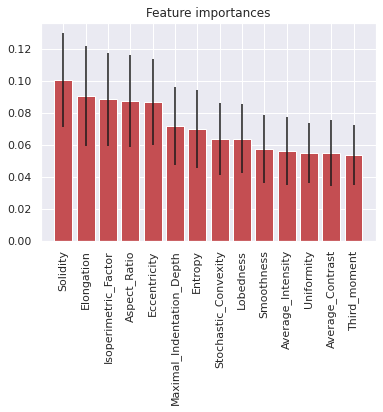

In [ ]:
# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train_scaled,y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(features.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, df.columns[indices[f]]+str("("+str(indices[f])+")"), importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.xticks(rotation=90)
plt.bar(range(features.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(features.shape[1]), df.columns[indices])
plt.xlim([-1, features.shape[1]])
plt.show()

In [ ]:
x=df.sample(frac = .10)
x=x.iloc[1:,:]
x.style.background_gradient(cmap='Blues')

In [ ]:
cl =[ col for col in df.columns]
df_col = pd.DataFrame([ cl[i] for i in np.argsort(importances)[::-1]])
df_col.style.background_gradient()

In [ ]:
df_shape_features = df.drop(['Average_Intensity','Average_Contrast', 'Smoothness', 'Third_moment', 'Uniformity','Entropy','Name'],axis=1)
df_text_features = df[['Average_Intensity','Average_Contrast', 'Smoothness', 'Third_moment', 'Uniformity','Entropy','Number','Name']]
df_shape_features.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 9 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Eccentricity               float64
 1   Aspect_Ratio               float64
 2   Elongation                 float64
 3   Solidity                   float64
 4   Stochastic_Convexity       float64
 5   Isoperimetric_Factor       float64
 6   Maximal_Indentation_Depth  float64
 7   Lobedness                  float64
 8   Number                     int64  
dtypes: float64(8), int64(1)
memory usage: 24.0 KB


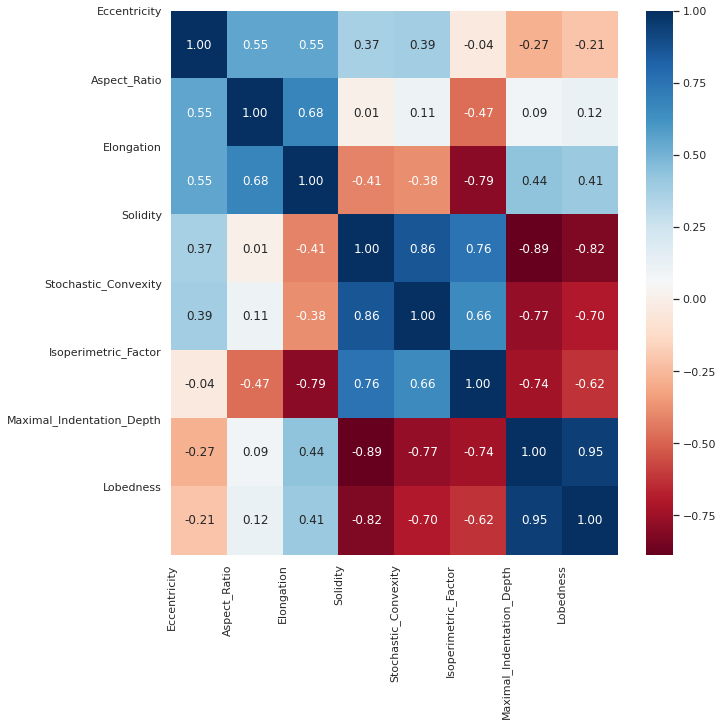

In [ ]:
corr =  df.drop(['Average_Intensity','Average_Contrast', 'Smoothness', 'Third_moment', 'Uniformity','Entropy','Number'],axis=1).corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

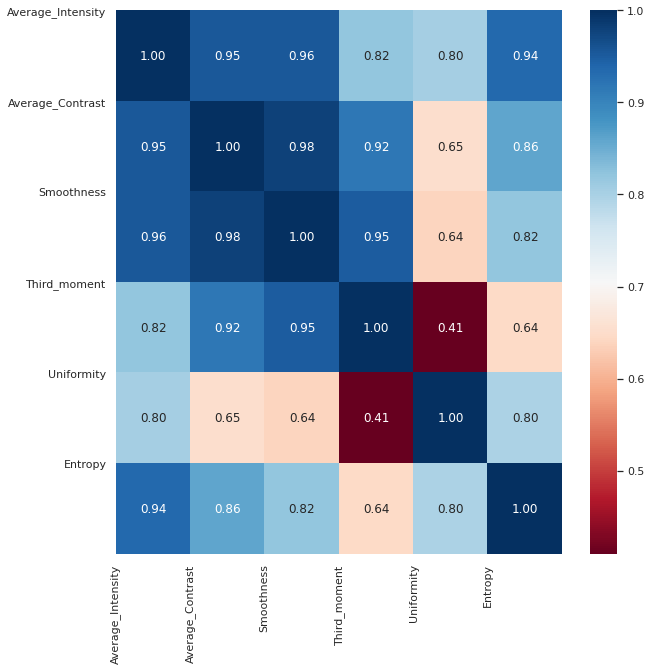

In [ ]:
corr =  df[['Average_Intensity','Average_Contrast', 'Smoothness', 'Third_moment', 'Uniformity','Entropy','Name']].corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

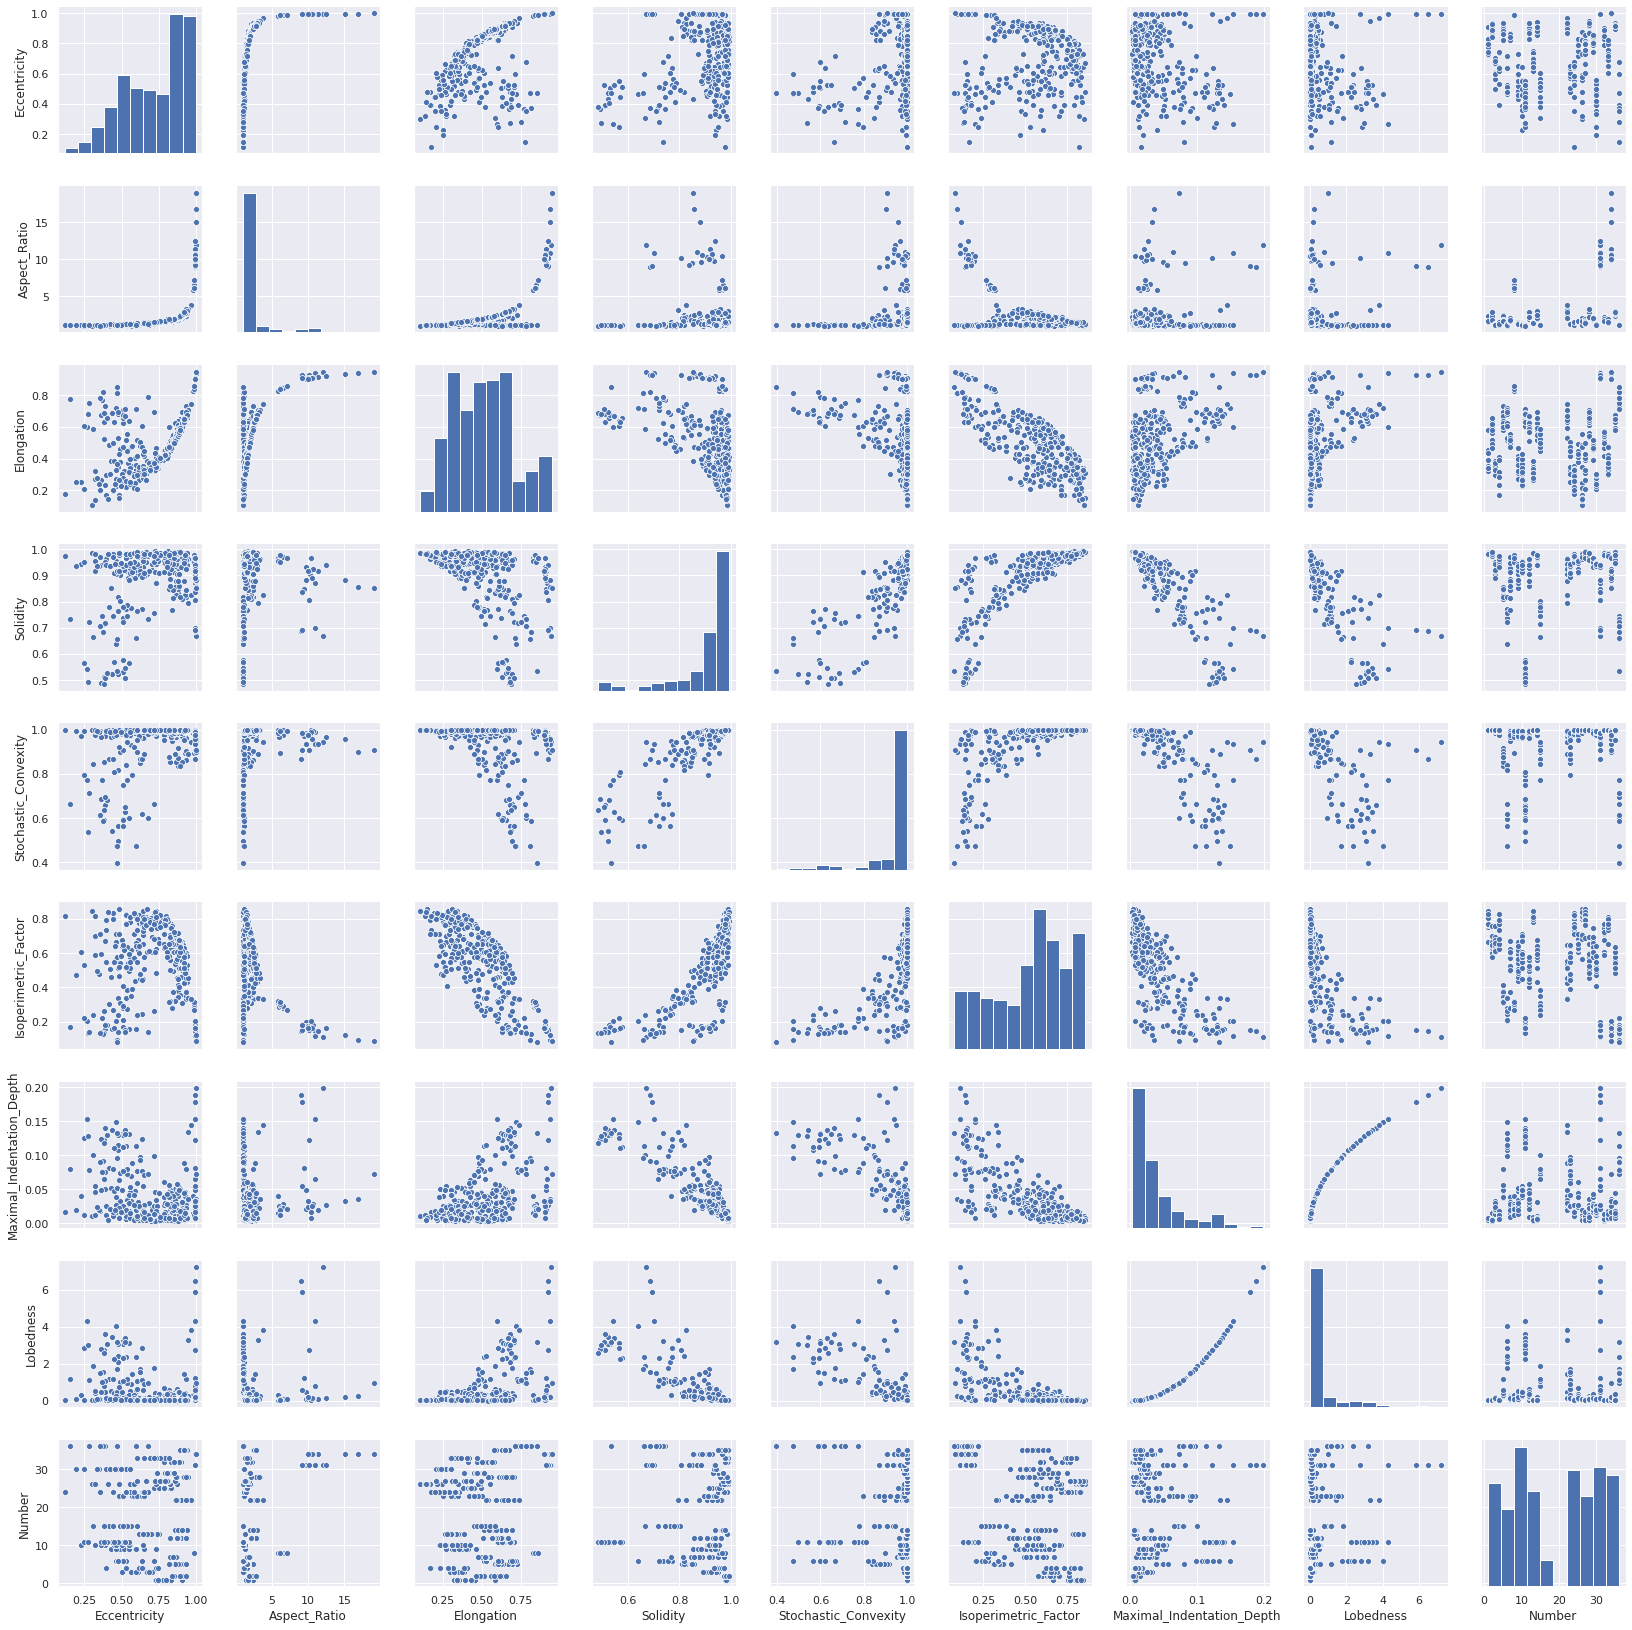

In [ ]:
sns.set_style('darkgrid')
sns.pairplot(df_shape_features)
plt.show()

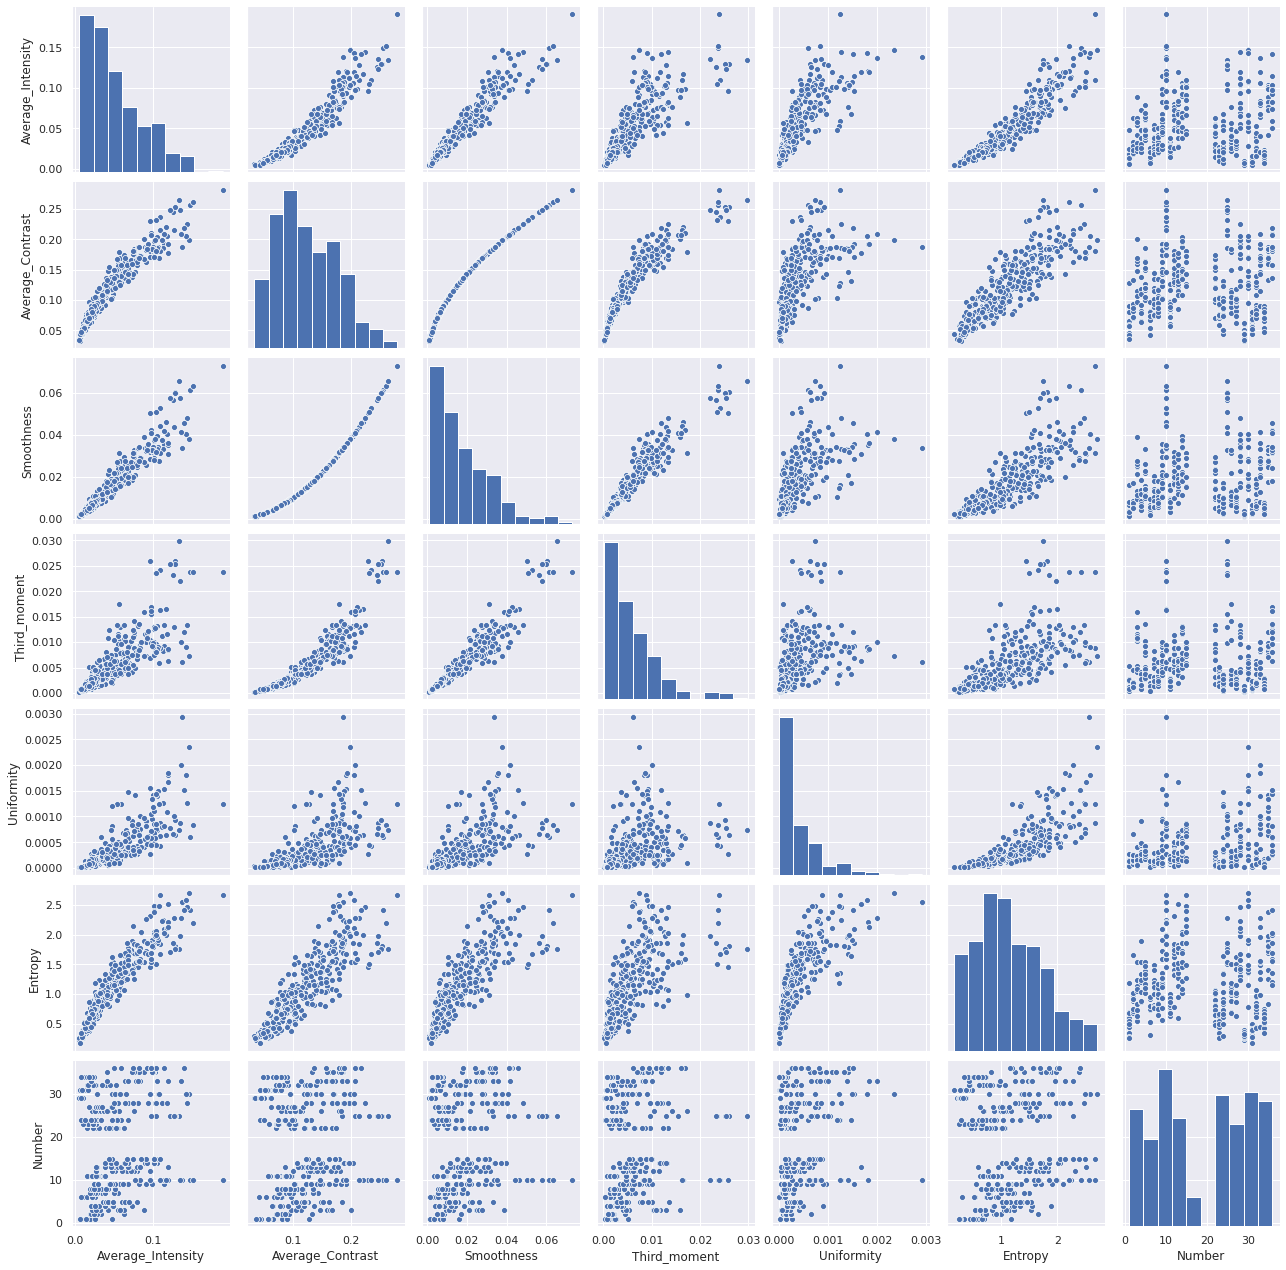

In [ ]:
sns.set_style('darkgrid')
sns.pairplot(df_text_features)
plt.show()

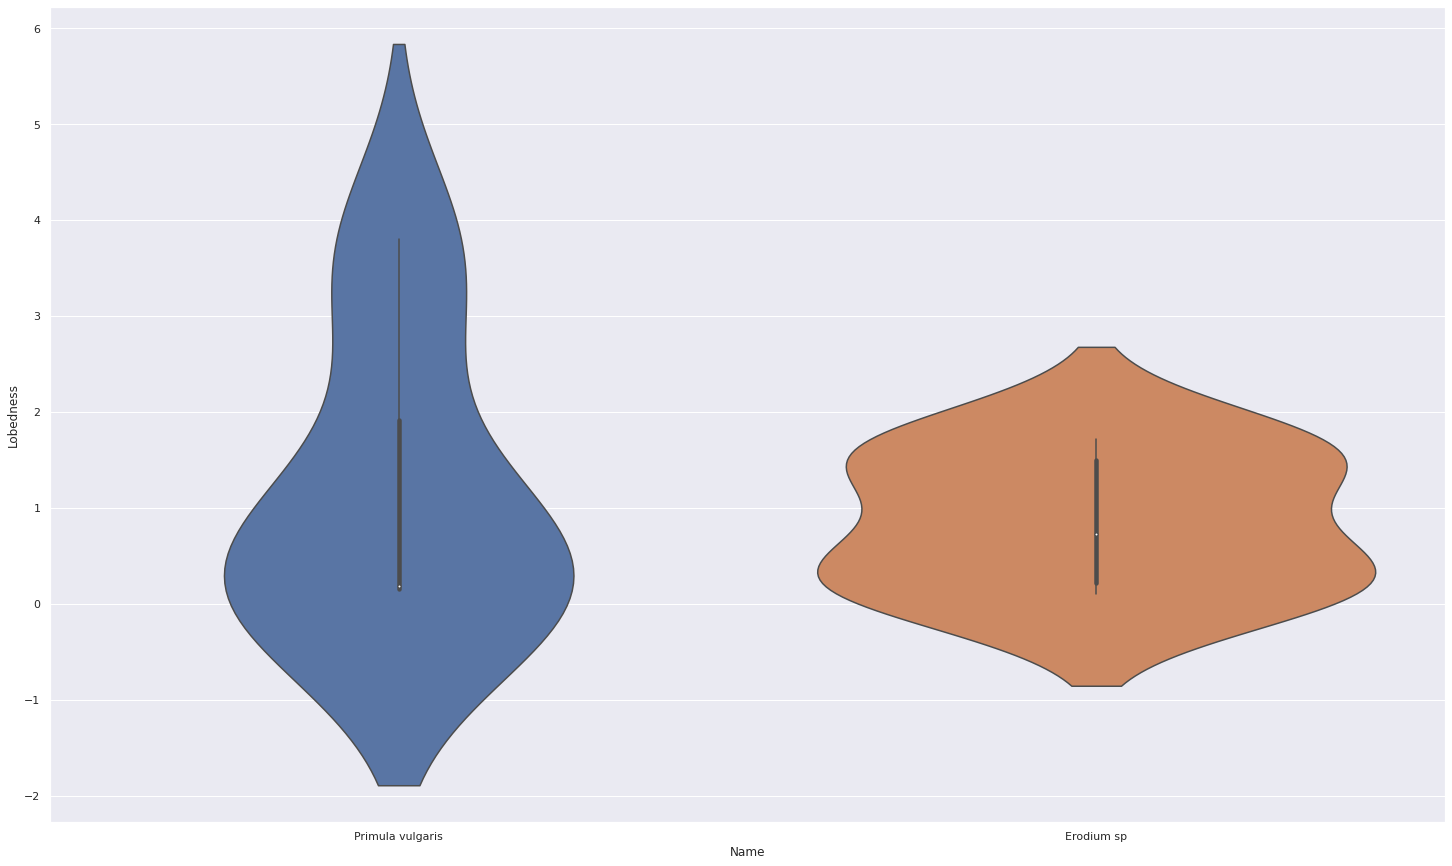

In [ ]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(25, 15))
sns.set(style="dark")
ax = sns.violinplot(x="Name", y="Lobedness", data=df.drop(['Average_Intensity','Average_Contrast', 'Smoothness', 'Third_moment', 'Uniformity','Entropy','Number'],axis=1)[175:190])

In [ ]:
sc = db.SimpleClassifier().fit(X_train_scaled, y_train)
print("score", sc.score(X_test_scaled, y_test))

Running DummyClassifier(strategy='prior')
accuracy: 0.043 recall_macro: 0.033 precision_macro: 0.001 f1_macro: 0.003
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.043 recall_macro: 0.033 precision_macro: 0.001 f1_macro: 0.003

Running GaussianNB()
accuracy: 0.678 recall_macro: 0.658 precision_macro: 0.635 f1_macro: 0.620
=== new best GaussianNB() (using recall_macro):
accuracy: 0.678 recall_macro: 0.658 precision_macro: 0.635 f1_macro: 0.620

Running MultinomialNB()
accuracy: 0.333 recall_macro: 0.288 precision_macro: 0.212 f1_macro: 0.214
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.051 recall_macro: 0.067 precision_macro: 0.013 f1_macro: 0.019
Running DecisionTreeClassifier(class_weight='balanced', max_depth=30)
accuracy: 0.604 recall_macro: 0.594 precision_macro: 0.561 f1_macro: 0.544
Running DecisionTreeClassifier(class_weight='balanced', min_impurity_decrease=0.01)
accuracy: 0.580 recall_macro: 0.581 precision_

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

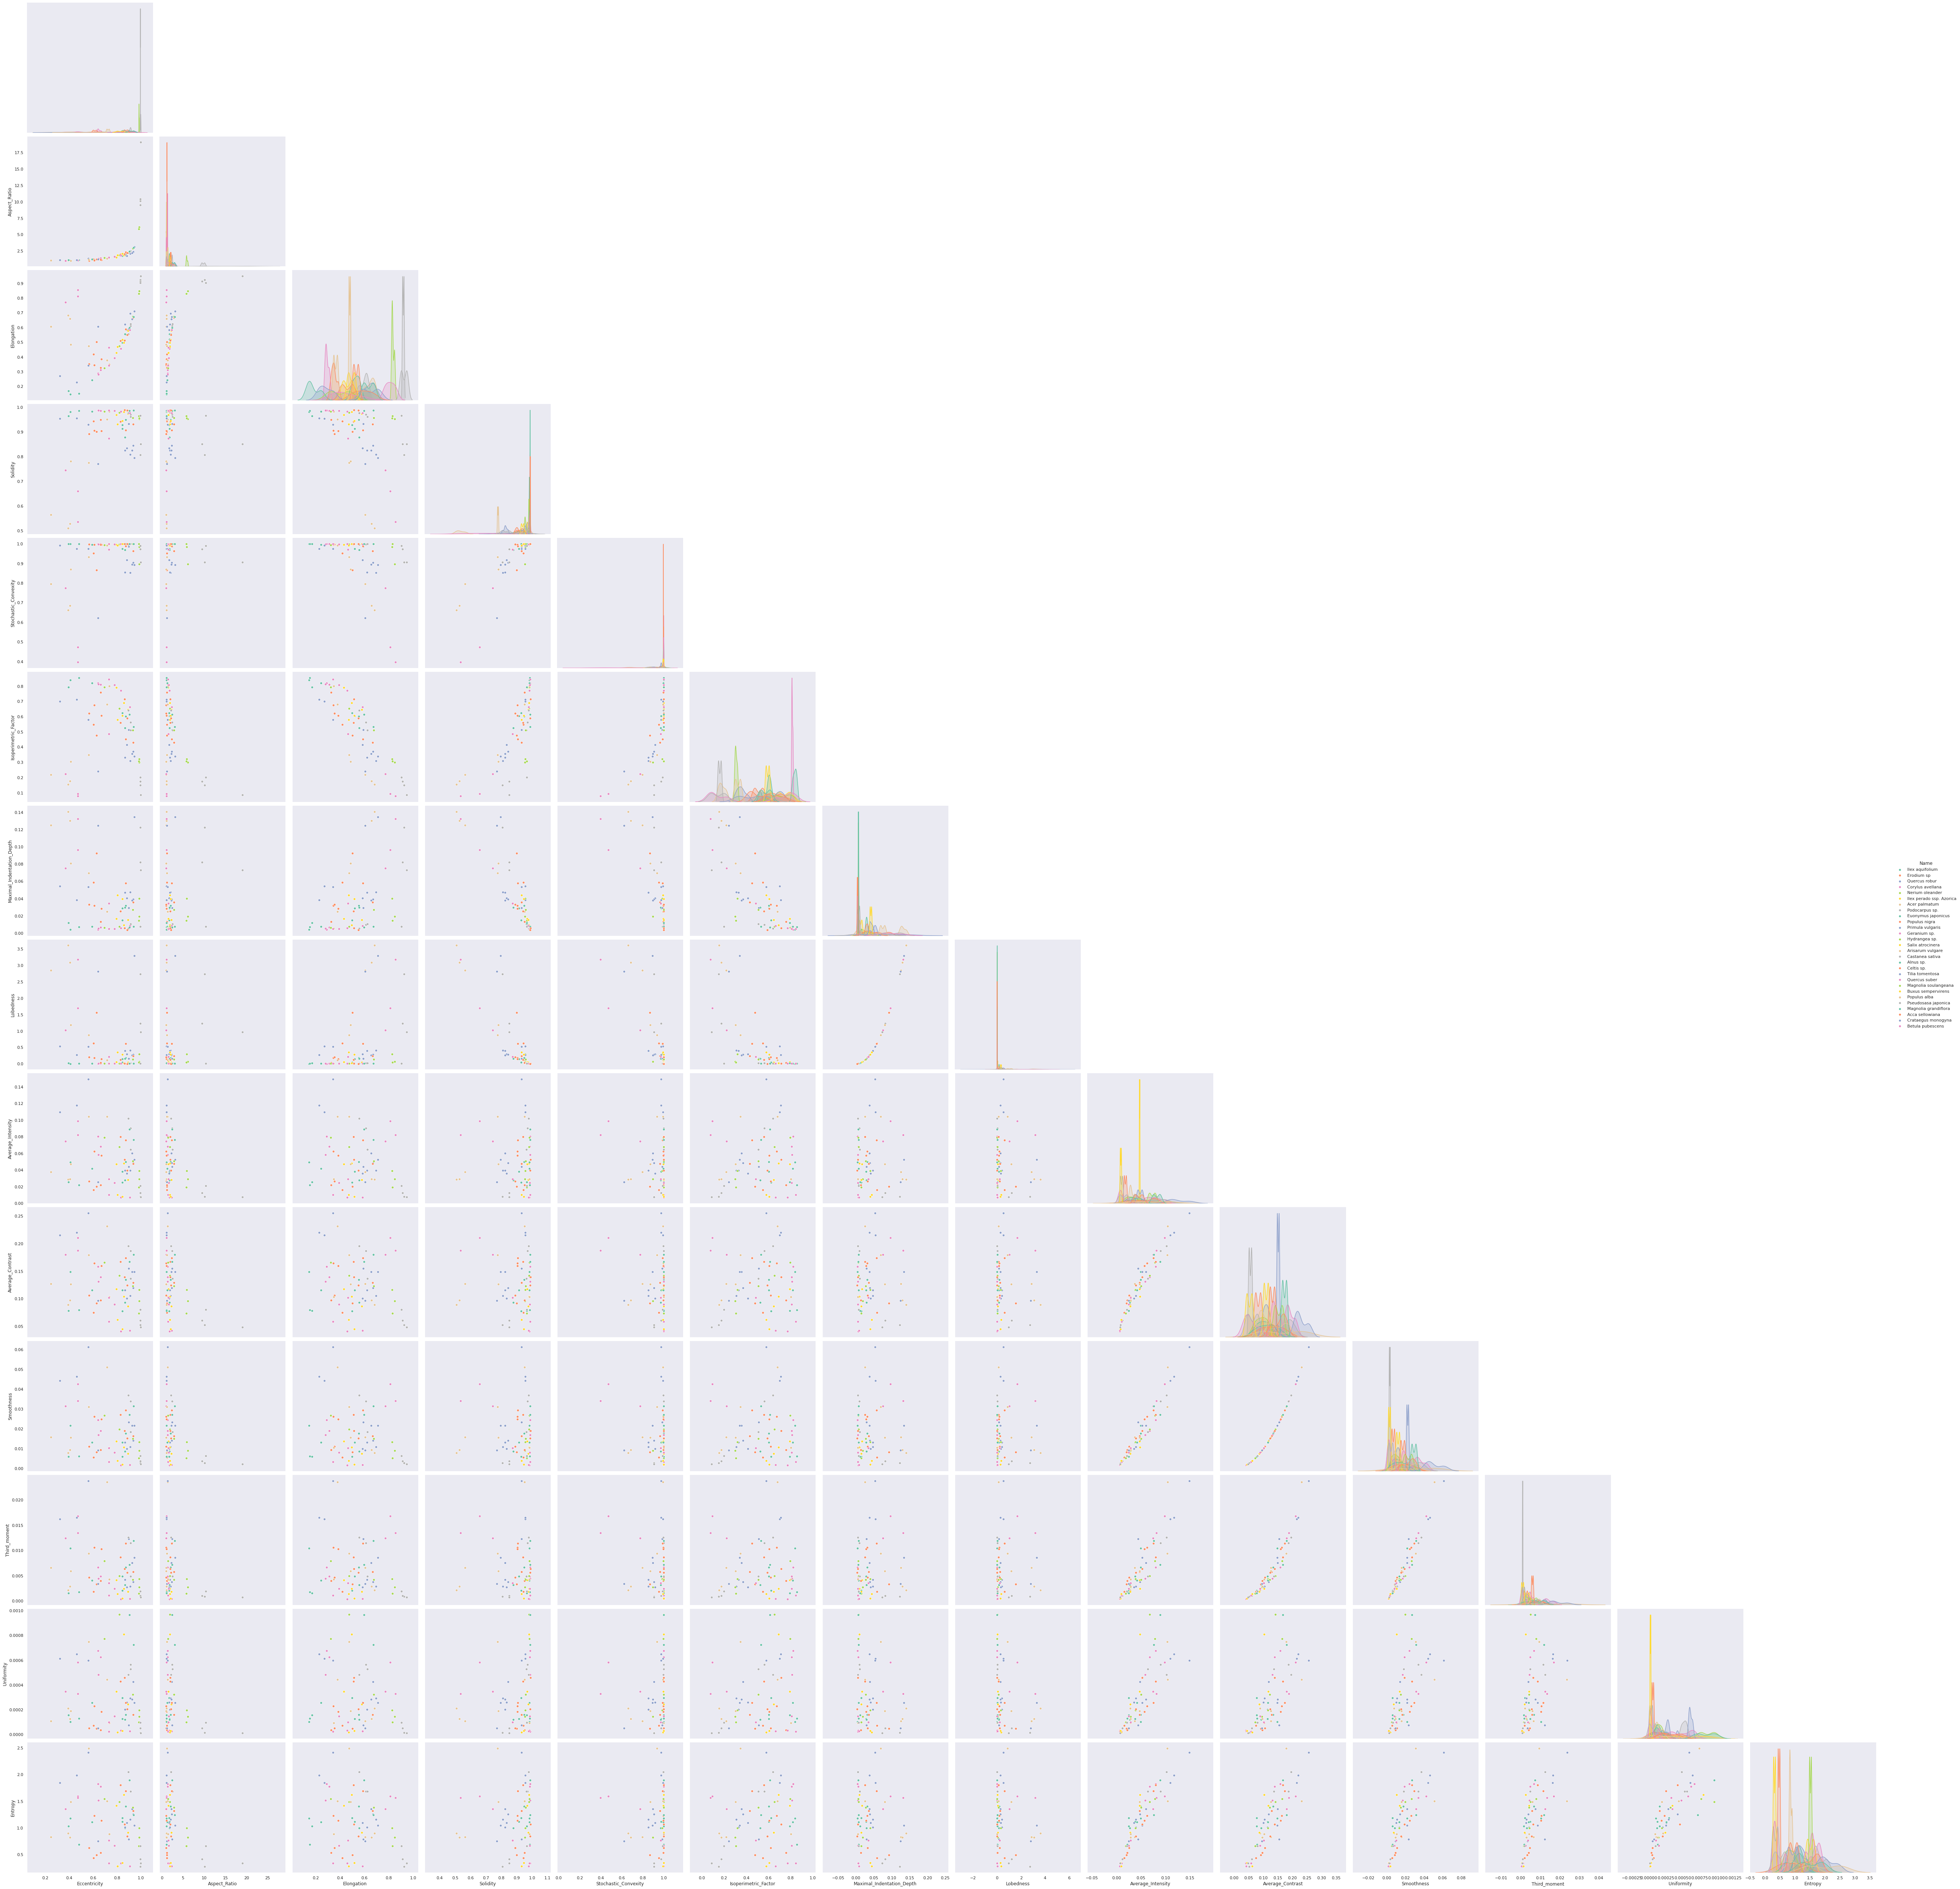

In [ ]:
sns.pairplot(df.drop(['Number'], axis=1).sample(frac = .20),hue="Name", corner = True,palette="Set2", size = 5)
sns.set(style="dark")
plt.show()

In [ ]:
display(IFrame(src='https://eigenfoo.xyz/lda/', width=1500, height=600))

https://www.mygreatlearning.com/blog/linear-discriminant-analysis-or-lda/#ldaimplementingscikitlearn


Linear Discriminant Analysis
Linear discriminant analysis is supervised machine learning, the technique used to find a linear combination of features that separates two or more classes of objects or events. 



Linear discriminant analysis, also known as LDA,  does the separation by computing the directions (“linear discriminants”) that represent the axis that enhances the separation between multiple classes. 



Like logistic Regression, LDA to is a linear classification technique, with the following  additional capabilities in comparison to logistic regression.

1.     LDA can be applied to two or more than two-class classification problems.

2.     Unlike Logistic Regression, LDA works better when classes are well separated.

3.     LDA works relatively well in comparison to Logistic Regression when we have few examples.



LDA is also a dimensionality reduction technique. As the name implies dimensionality reduction techniques reduce the number of dimensions (i.e. variables or dimensions or features) in a dataset while retaining as much information as possible. 


Linear discriminant analysis: The goal of LDA is to discriminate different classes in low dimensional space by retaining the components containing feature values that have the best separation across classes. 


https://eigenfoo.xyz/lda/


In plain English, if you have high-dimensional data (i.e. a large number of features) from which you wish to classify observations, LDA will help you transform your data so as to make the classes as distinct as possible.



**More rigorously, LDA will find the linear projection of your data into a lower-dimensional subspace that optimizes some measure of class separation. The dimension of this subspace is necessarily strictly less than the number of classes.**

0.7647058823529411

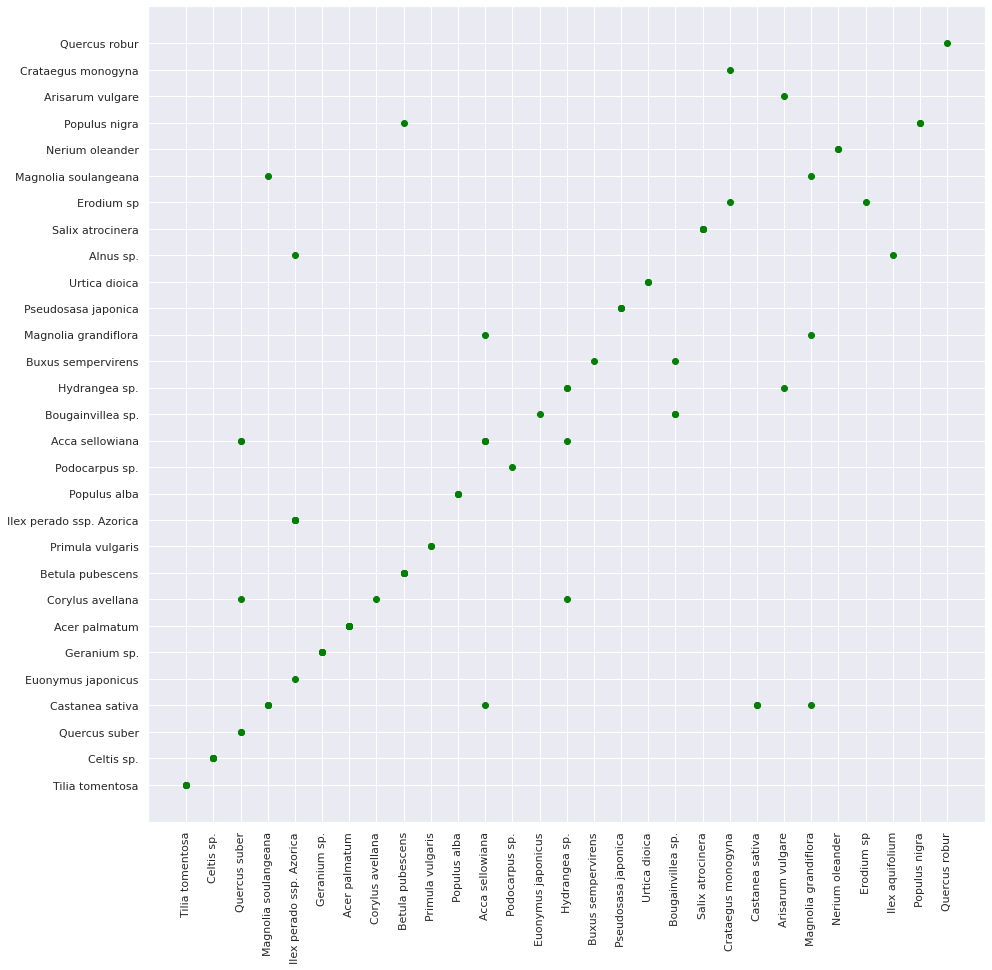

In [ ]:
clfLDA = LinearDiscriminantAnalysis()
X_lda = clfLDA.fit(X_train,y_train)
y_pred = clfLDA.predict(X_test)
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
plt.scatter(y_test,y_pred,c="green")
clfLDA.score(X_test,y_test)


[0.36711107 0.31134228 0.09014969 0.0570226  0.05278519 0.03690523
 0.03010586 0.01894006 0.01149418 0.00906038 0.00577637 0.00436669
 0.00340475 0.00153565]

1.0000000000000002

0.7686030433251257


<BarContainer object of 14 artists>

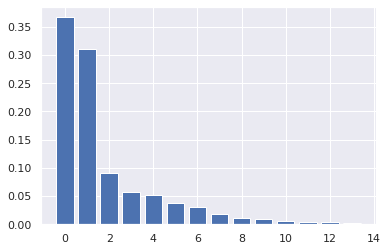

In [ ]:
print(clfLDA.explained_variance_ratio_)
print()
print(clfLDA.explained_variance_ratio_.sum())
print()
print(clfLDA.explained_variance_ratio_[0:3].sum())
plt.bar([x for x in  range(14)],clfLDA.explained_variance_ratio_)

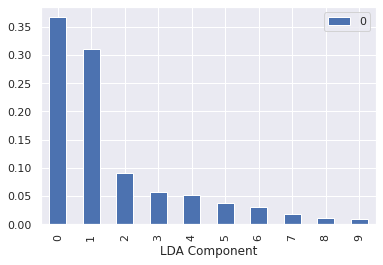

In [ ]:


X = X_train_scaled
y = y_train
target_names = df.Number
explained_variance = pd.DataFrame(clfLDA.explained_variance_ratio_)
ax = explained_variance.head(10).plot.bar()
ax.set_xlabel('LDA Component')
X_lda = clfLDA.fit_transform(X_train_scaled,y_train)



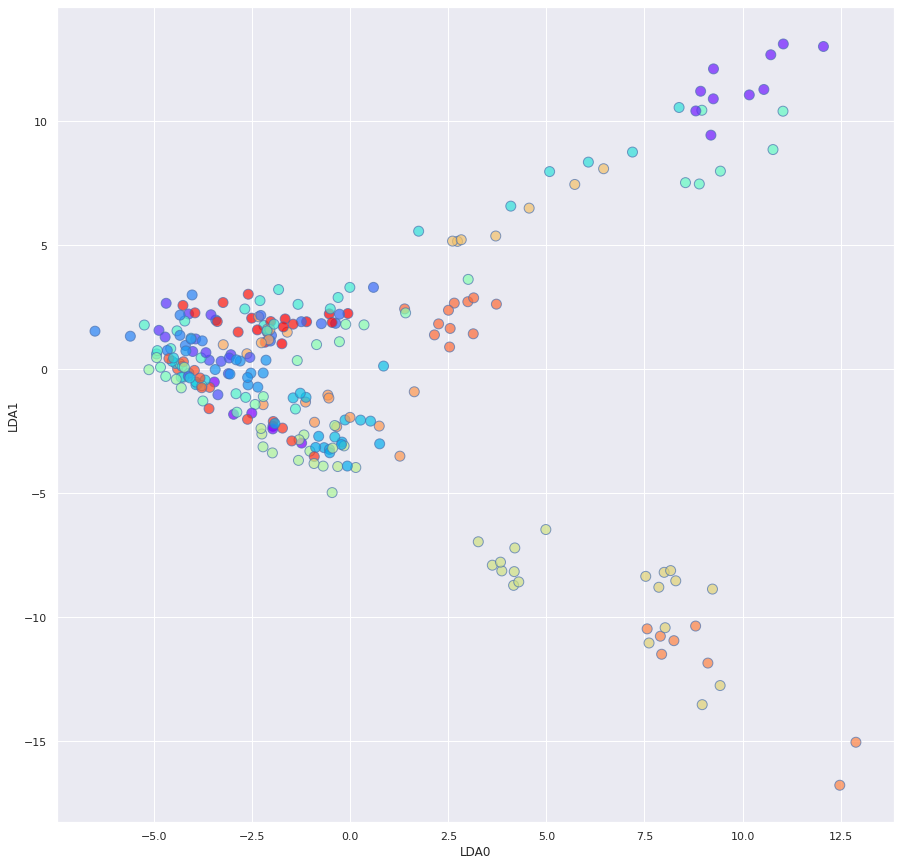

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder
y_ = le.fit_transform(X,y)
plt.figure(figsize=(15,15))
plt.xlabel("LDA0")
plt.ylabel("LDA1")
plt.scatter(X_lda[:,1],X_lda[:,0], c=y_,cmap='rainbow',alpha=0.7,edgecolors='b',s=100)


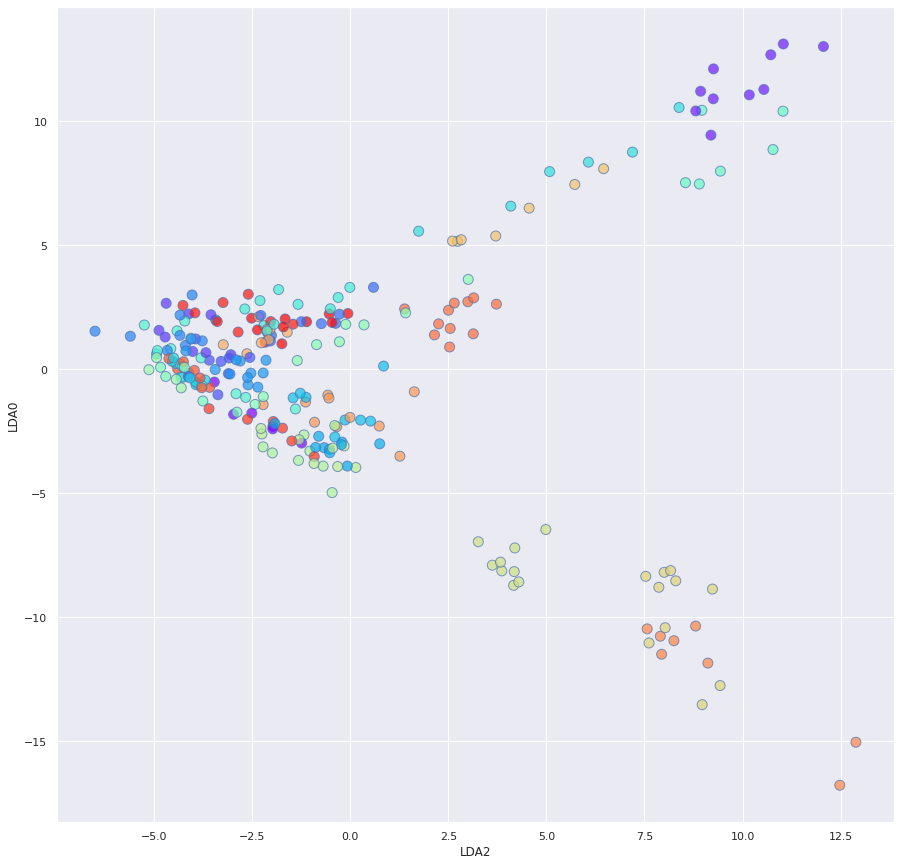

In [ ]:
plt.figure(figsize=(15,15))
plt.xlabel("LDA2")
plt.ylabel("LDA0")
plt.scatter(X_lda[:,1],X_lda[:,0], c=y_,cmap='rainbow',alpha=0.7,edgecolors='b',s=100)

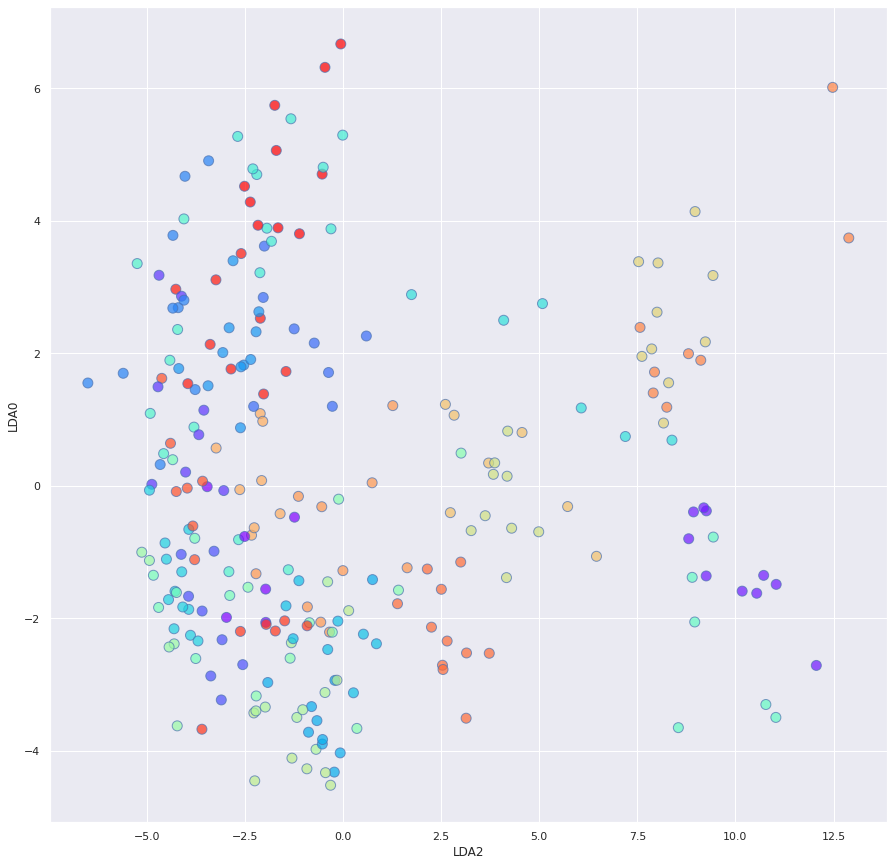

In [ ]:
plt.figure(figsize=(15,15))
plt.xlabel("LDA2")
plt.ylabel("LDA0")
plt.scatter(X_lda[:,1],X_lda[:,2], c=y_,cmap='rainbow',alpha=0.7,edgecolors='b',s=100)

Text(0.5, 0, 'LDA Components')

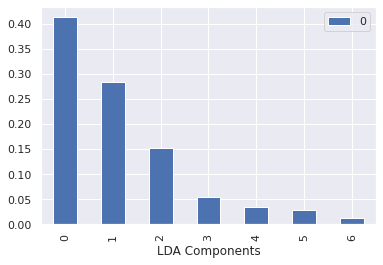

In [ ]:
X = X_train_scaled
y = y_train
target_names = df.Name.unique()

pca = PCA()
X_r = pca.fit(X,y)
explained_variance_r = pd.DataFrame(pca.explained_variance_ratio_)
ax = explained_variance_r.head(7).plot.bar()
ax.set_xlabel('LDA Components')


0.8235294117647058
[0.12509877 0.10996276 0.09793009 0.09221561 0.08786884 0.0840422
 0.07591115 0.06402038 0.05313885 0.0505546  0.05023282 0.04310966
 0.03413144 0.03178283]


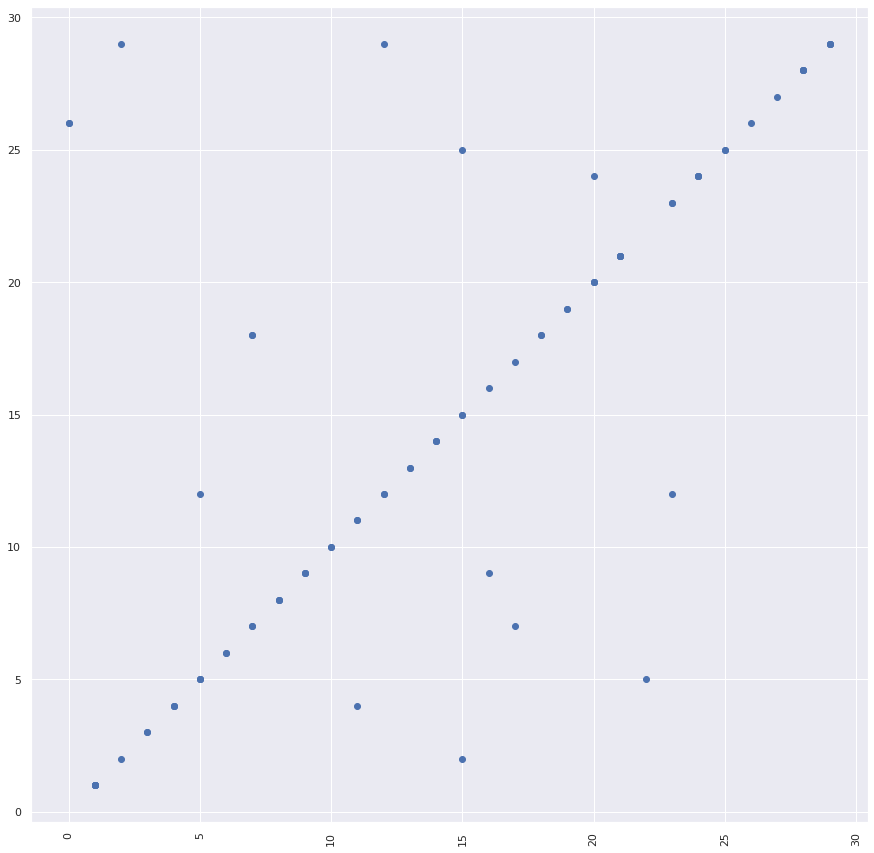

In [ ]:
from sklearn.model_selection import train_test_split
le0 = LabelEncoder
y0_ = le.fit_transform(features,names)
sk_lda = LinearDiscriminantAnalysis()
X_lda0 = sk_lda.fit_transform(features,names)
X_train, X_test, y_train, y_test = train_test_split(X_lda0 ,y0_, random_state=211)
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train)
y_pred = clf_rf.predict(X_test)
plt.figure(figsize=(15,15))
plt.scatter(y_test,y_pred)
plt.xticks(rotation=90)
print(clf_rf.score(X_test,y_test))
print(clf_rf.feature_importances_)

#clf_rf.fit(X_tran_lda,y_train_lda)

<BarContainer object of 14 artists>

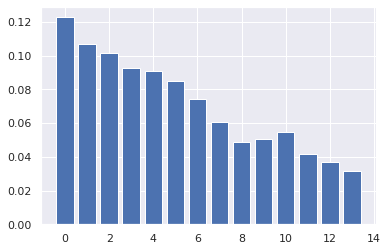

In [ ]:
plt.bar([x for x in  range(14)],clf_rf.feature_importances_)

In [ ]:
sc = db.SimpleClassifier().fit(X_lda0,y0_)


Running DummyClassifier(strategy='prior')
accuracy: 0.047 recall_macro: 0.033 precision_macro: 0.002 f1_macro: 0.003
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.047 recall_macro: 0.033 precision_macro: 0.002 f1_macro: 0.003

Running GaussianNB()
accuracy: 0.788 recall_macro: 0.793 precision_macro: 0.833 f1_macro: 0.783
=== new best GaussianNB() (using recall_macro):
accuracy: 0.788 recall_macro: 0.793 precision_macro: 0.833 f1_macro: 0.783

Running MultinomialNB()
accuracy: 0.409 recall_macro: 0.400 precision_macro: 0.383 f1_macro: 0.340
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.065 recall_macro: 0.067 precision_macro: 0.011 f1_macro: 0.018
Running DecisionTreeClassifier(class_weight='balanced', max_depth=30)
accuracy: 0.685 recall_macro: 0.688 precision_macro: 0.701 f1_macro: 0.665
Running DecisionTreeClassifier(class_weight='balanced', min_impurity_decrease=0.01)
accuracy: 0.700 recall_macro: 0.700 precision_

In [ ]:
#display(IFrame(src='https://medium.com/swlh/recall-precision-f1-roc-auc-and-everything-542aedf322b9#:~:text=F1%20Score%20combines%20Recall%20and,have%20an%20uneven%20class%20distribution', width=1500, height=600))

https://medium.com/swlh/recall-precision-f1-roc-auc-and-everything-542aedf322b9#:~:text=F1%20Score%20combines%20Recall%20and,have%20an%20uneven%20class%20distribution


Accuracy will not always be the metric.

Precision and recall are often in tension. That is, improving precision typically reduces recall and vice versa.

AUC-ROC curve is one of the most commonly used metrics to evaluate the performance of machine learning algorithms.

ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

The ROC curve can be used to choose the best operating point.

"PCA is a transformation from the original feature space into another space with more desirable properties.


 When analysing data it is frequently the case that, even though special care is taken in the selection process, the selected variables exhibit very frequently high
correlation.


 PCA is a method to overcome this problem, as it provides a set of new variables
which are linear combinations of each original feature, but unlike the original features, the
principal components are not correlated among each other.


On the other hand, PCA verifies a very important property: the new principal axes successfully maximize the variance in the data with respect to themselves and they are naturally
ranked by data variability, i.e., the first principal axis explains the most data variability and
each successive axis explains less and less data variability.


These properties make PCA a
valuable tool, helping to avoid the dimensionality curse and allowing effective dimensionality
reduction.



Another interesting feature of principal components is that they are the continuous solution
of the cluster membership indicators of the K-means clustering method, i.e., the PCA
transformation automatically performs data clustering according to the K-means objective
function."


In [ ]:
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA

X = X_train_scaled
y = y_train
target_names = df.Name.unique()

pca = PCA()
X_r = pca.fit(X,y)

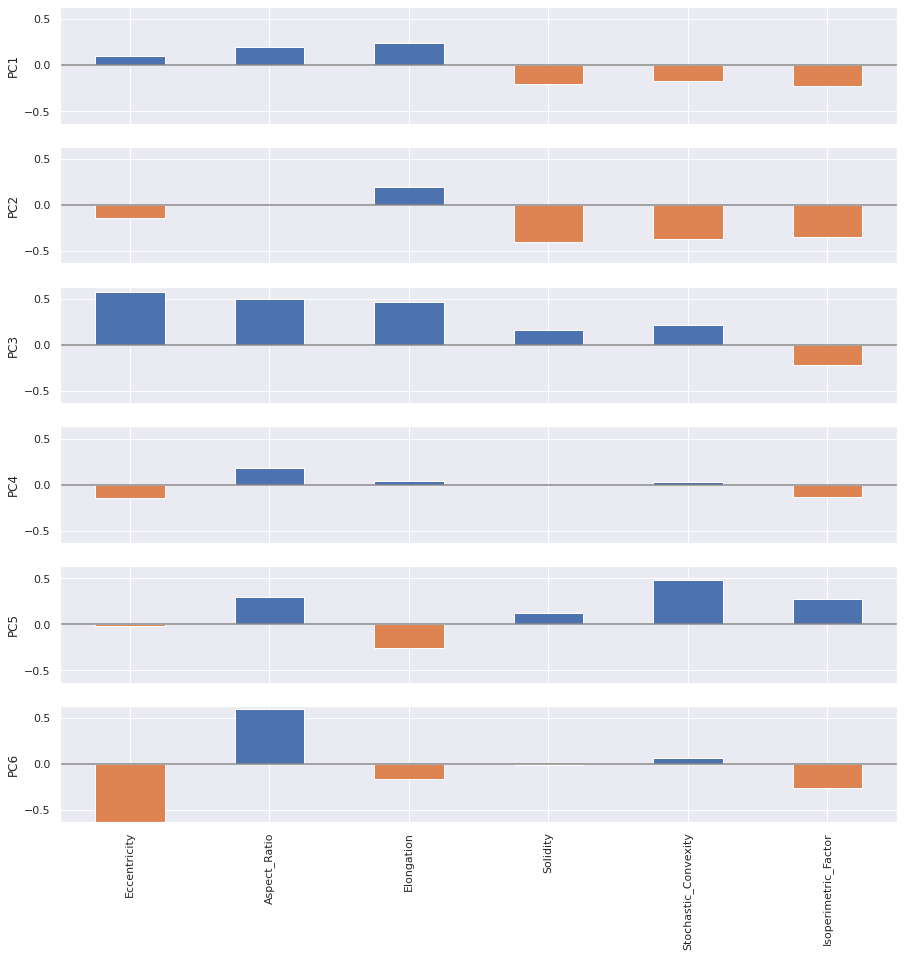

                             0         1  ...         4         5
Eccentricity          0.102637 -0.137365  ... -0.013248 -0.625915
Aspect_Ratio          0.202435  0.004281  ...  0.292859  0.602977
Elongation            0.238472  0.193671  ... -0.259273 -0.159109
Solidity             -0.199508 -0.399578  ...  0.118599 -0.004648
Stochastic_Convexity -0.169721 -0.366886  ...  0.480596  0.066002
Isoperimetric_Factor -0.223161 -0.348148  ...  0.275207 -0.261858

[6 rows x 6 columns]


In [ ]:
''' Practical Statistic for Data Scientists - Bruce, Bruce and Gedeck '''
'''https://learning.oreilly.com/library/view/practical-statistics-for/9781492072935/'''

#from matplotlib.pyplot import figure
#from sklearn.decomposition import PCA
loadings = pd.DataFrame(pca.components_[0:6, 0:6], columns=X_train_scaled.columns[0:6])
maxPC = 1.01* np.max(np.max(np.abs(loadings.loc[0:6,:])))
f,axes = plt.subplots(6,1, sharex=True)
f.set_figheight(15)
f.set_figwidth(15)


for i,ax in enumerate(axes):
   pc_loadings = loadings.iloc[i,:]
   colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
   ax.axhline(color='#888888')
   pc_loadings.plot.bar(ax=ax,color=colors)
   ax.set_ylabel(f'PC{i+1}')
   ax.set_ylim(-maxPC,maxPC)
plt.show()
print(loadings.transpose())
  

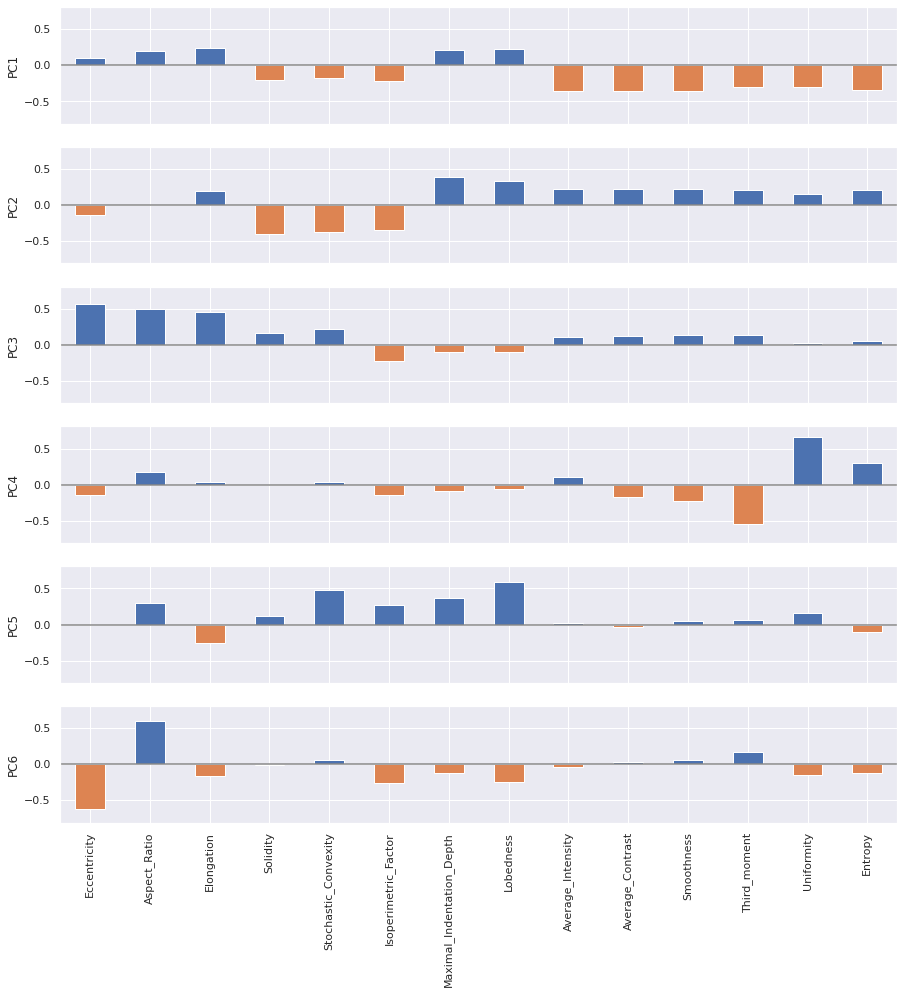

                                 0         1   ...        12        13
Eccentricity               0.102637 -0.137365  ...  0.008955  0.000169
Aspect_Ratio               0.202435  0.004281  ... -0.019575 -0.000013
Elongation                 0.238472  0.193671  ... -0.002052  0.008379
Solidity                  -0.199508 -0.399578  ...  0.068345 -0.005229
Stochastic_Convexity      -0.169721 -0.366886  ... -0.029929 -0.003602
Isoperimetric_Factor      -0.223161 -0.348148  ... -0.070805  0.011506
Maximal_Indentation_Depth  0.215830  0.392509  ... -0.104114 -0.000128
Lobedness                  0.228132  0.341901  ...  0.103535 -0.003246
Average_Intensity         -0.361721  0.225231  ... -0.549755  0.615715
Average_Contrast          -0.355957  0.220213  ... -0.125440  0.036450
Smoothness                -0.349610  0.226627  ... -0.348719 -0.724699
Third_moment              -0.305939  0.205378  ...  0.584646  0.266256
Uniformity                -0.294767  0.149891  ...  0.233323 -0.050195
Entrop

In [ ]:
loadings = pd.DataFrame(pca.components_, columns=X_train_scaled.columns)
maxPC = 1.01* np.max(np.max(np.abs(loadings.loc[0:14,:])))
f,axes = plt.subplots(6,1, sharex=True)


f.set_figheight(15)
f.set_figwidth(15)


for i,ax in enumerate(axes):
   pc_loadings = loadings.iloc[i,:]
   colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
   ax.axhline(color='#888888')
   pc_loadings.plot.bar(ax=ax,color=colors)
   ax.set_ylabel(f'PC{i+1}')
   ax.set_ylim(-maxPC,maxPC)
plt.show()
print(loadings.transpose())
  

<Figure size 1600x1600 with 0 Axes>

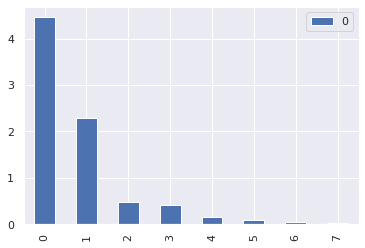

In [ ]:

#from sklearn.decomposition import PCA
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X =  X_train_scaled.iloc[1:,0:8]
y = y_train
target_names = df.Name.unique()

pca = PCA()
X_r = pca.fit(X)
figure(num=None, figsize=(20, 20), dpi=80)
explained_variance = pd.DataFrame(pca.explained_variance_)
ax = explained_variance.head(10).plot.bar()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,names, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

In [ ]:
#display(IFrame(src='https://learning.oreilly.com/library/view/practical-statistics-for/9781492072935/', width=1500, height=600)) 

Text(0.5, 0, 'Component')

<Figure size 1600x1600 with 0 Axes>

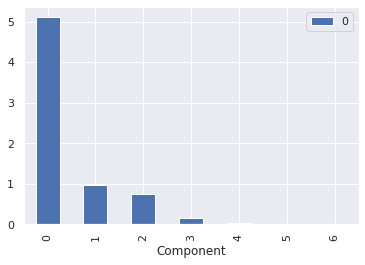

In [ ]:
#import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



X =  X_train_scaled.iloc[1:,7:15]
y = y_train
target_names = df.Name.unique()

pca = PCA()
X_r = pca.fit(X)
figure(num=None, figsize=(20, 20), dpi=80)
explained_variance = pd.DataFrame(pca.explained_variance_)
ax = explained_variance.head(10).plot.bar()
ax.set_xlabel('Component')

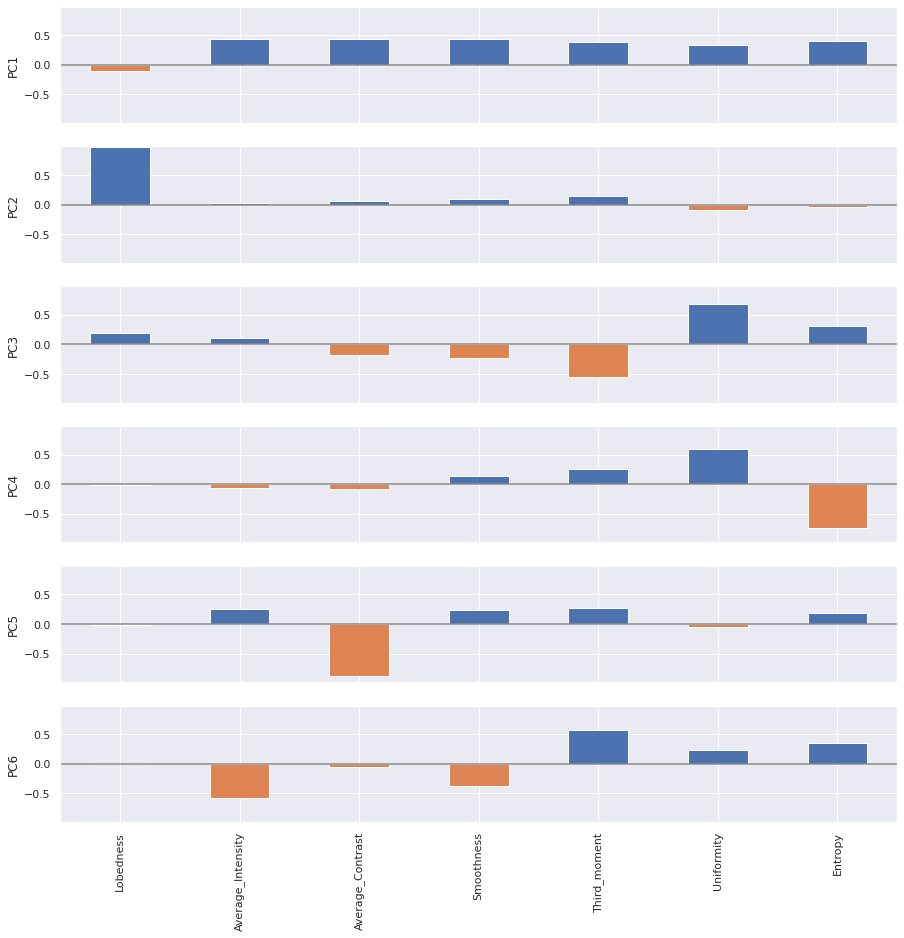

                          0         1         2         3         4         5
Lobedness         -0.099844  0.976386  0.189276 -0.020666 -0.020071  0.006804
Average_Intensity  0.439537  0.032606  0.107562 -0.056363  0.260707 -0.584765
Average_Contrast   0.432370  0.059870 -0.181244 -0.087223 -0.874853 -0.048111
Smoothness         0.430746  0.099328 -0.231148  0.146924  0.243771 -0.382662
Third_moment       0.380680  0.152819 -0.551403  0.252347  0.267500  0.567731
Uniformity         0.341533 -0.087296  0.680561  0.590400 -0.052507  0.241980
Entropy            0.403474 -0.034393  0.314829 -0.744950  0.180343  0.358309


In [ ]:
#from matplotlib.pyplot import figure

loadings = pd.DataFrame(pca.components_[0:6, :], columns=X_train_scaled.columns[7:15])
maxPC = 1.01* np.max(np.max(np.abs(loadings.loc[0:6,:])))
f,axes = plt.subplots(6,1, sharex=True)


f.set_figheight(15)
f.set_figwidth(15)


for i,ax in enumerate(axes):
   pc_loadings = loadings.iloc[i,:]
   colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
   ax.axhline(color='#888888')
   pc_loadings.plot.bar(ax=ax,color=colors)
   ax.set_ylabel(f'PC{i+1}')
   ax.set_ylim(-maxPC,maxPC)
plt.show()
print(loadings.transpose())
  

In [ ]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,names, test_size=0.2, random_state=4)

In [ ]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)


In [ ]:
#from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=222)
rf.fit(X_train_scaled, y_train)   # with default settings


RandomForestClassifier(random_state=222)

In [ ]:
y_pred = rf.predict(X_test_scaled)
df.Name.unique(),;

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))  
print(accuracy_score(y_test, y_pred)) 
print(rf.score(X_test_scaled, y_test))

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 1]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 1 0

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=300, random_state=22).fit(X_train_scaled,y_train)
clf.predict(X_test_scaled)
print(clf.score(X_test_scaled,y_test))

0.7205882352941176


In [ ]:
# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
# fit a Naive Bayes model to the data
model = GaussianNB()

model.fit(X_train_scaled, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test_scaled)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
#print(metrics.confusion_matrix(expected, predicted))


GaussianNB()
                          precision    recall  f1-score   support

         Acca sellowiana       0.50      1.00      0.67         1
               Alnus sp.       0.67      1.00      0.80         2
        Arisarum vulgare       1.00      1.00      1.00         2
        Betula pubescens       1.00      0.57      0.73         7
       Bougainvillea sp.       1.00      1.00      1.00         2
      Buxus sempervirens       1.00      1.00      1.00         2
         Castanea sativa       0.50      1.00      0.67         1
              Celtis sp.       0.67      0.67      0.67         3
        Corylus avellana       1.00      0.50      0.67         2
      Crataegus monogyna       1.00      1.00      1.00         1
              Erodium sp       1.00      1.00      1.00         3
      Euonymus japonicus       1.00      0.33      0.50         3
            Geranium sp.       1.00      1.00      1.00         3
           Hydrangea sp.       1.00      0.50      0.67       

In [ ]:
#!pip install pycaret
#from pycaret.classification import *

In [9]:
from pycaret.classification import *

In [2]:
exp_clf102 = setup(data = df.drop(['Number'],axis = 1), target = 'Name', session_id=3145,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                   group_features = [[ i for i in df.columns[0:8]],[j for j in df.columns[8:-2]]] )

NameError: ignored

In [1]:
compare_models()

NameError: ignored

In [ ]:
lr = create_model('lr', fold = 5) 

In [ ]:
t_lr  = tune_model(lr)

In [ ]:
#plot_model(t_lr, plot = 'auc')
#plot_model(t_lr, plot = 'roc')

In [ ]:

knn = create_model('knn', fold = 5)

In [ ]:
t_knn = tune_model(knn)